In [ ]:
# Import all necessary librarues
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/D1_healthcare-dataset-stroke-data.csv')

In [ ]:
# Understand the dataset
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5893 non-null   int64  
 1   gender             5893 non-null   object 
 2   age                5893 non-null   float64
 3   hypertension       5893 non-null   int64  
 4   heart_disease      5893 non-null   int64  
 5   ever_married       5893 non-null   object 
 6   work_type          5893 non-null   object 
 7   Residence_type     5893 non-null   object 
 8   avg_glucose_level  5893 non-null   float64
 9   bmi                5552 non-null   float64
 10  smoking_status     5748 non-null   object 
 11  stroke             5893 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 552.6+ KB


In [ ]:
# Check for missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  341
smoking_status       145
stroke                 0
dtype: int64

In [ ]:
# We can see that there are 261 missing values in the 'bmi' column
# Dealing with missing values
# Fill the missing values in the 'bmi' column with the mean value

mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

df['smoking_status'].fillna('Unknown', inplace=True)

In [ ]:
# Check Null values again.
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Encoding categorical variables into Numerical values
# ONE Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)


In [ ]:
# Drop 'id' column if it exists

df.drop('id', axis=1, inplace=True, errors='ignore')

In [ ]:
df.head()

age  hypertension  heart_disease  avg_glucose_level        bmi  stroke  \
0  67.0             0              1             228.69  36.600000       1   
1  61.0             0              0             202.21  29.006142       1   
2  80.0             0              1             105.92  32.500000       1   
3  49.0             0              0             171.23  34.400000       1   
4  79.0             1              0             174.12  24.000000       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

<Axes: xlabel='stroke', ylabel='count'>

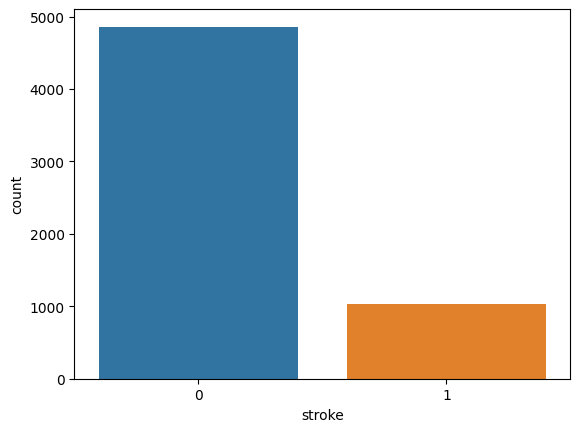

In [ ]:
# Plot Target variable distribution in Seaborn

import seaborn as sns

sns.countplot(x='stroke', data=df)

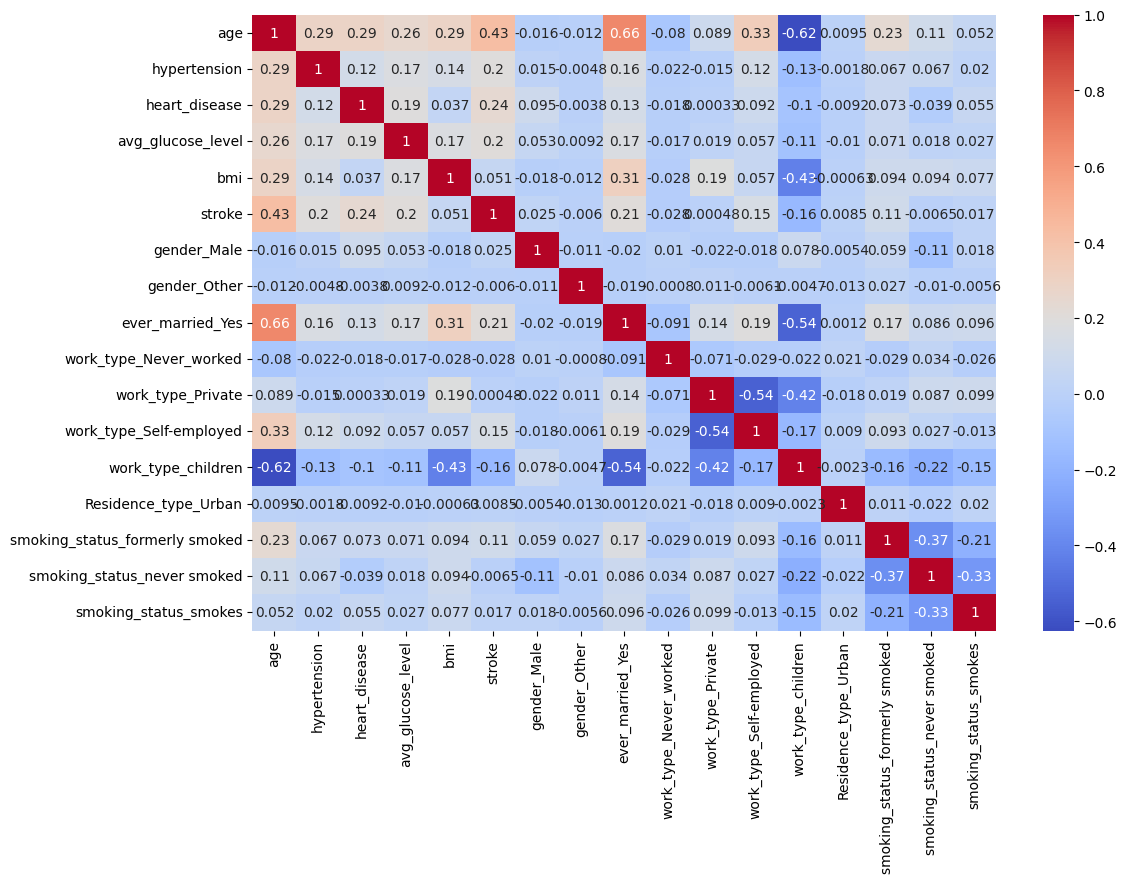

In [ ]:
# Dataset is highly imbalanced with only a small fraction of the samples having a stroke.
# Correlation Matrix

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(df.columns)


Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')


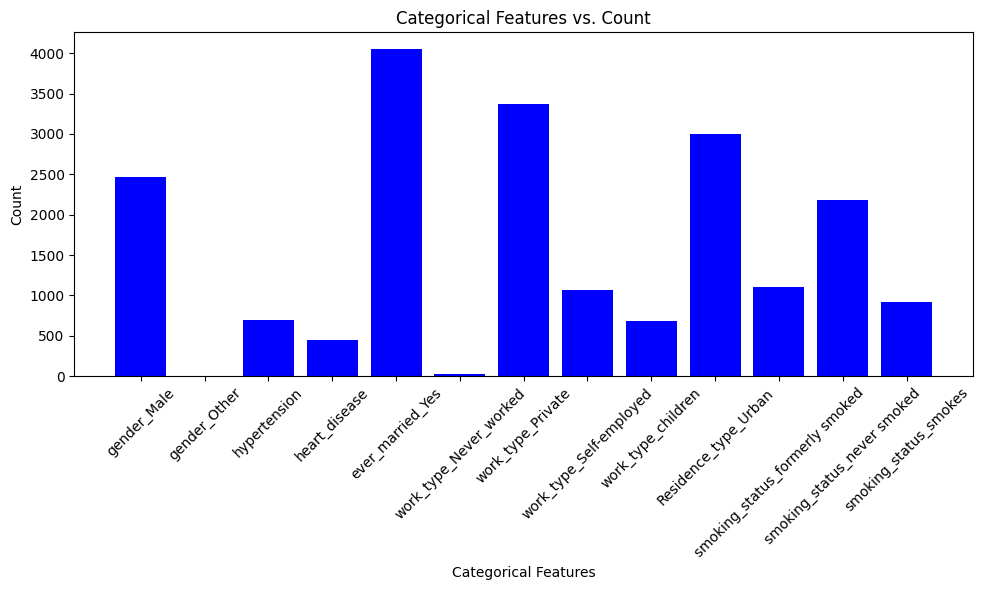

In [ ]:
import matplotlib.pyplot as plt

# Define the categorical features
categorical_features = ['gender_Male', 'gender_Other', 'hypertension', 'heart_disease', 'ever_married_Yes',
                        'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
                        'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']

# Calculate the count of each category in the dataset
category_counts = df[categorical_features].sum().values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categorical_features, category_counts, color='blue')
plt.xlabel('Categorical Features')
plt.ylabel('Count')
plt.title('Categorical Features vs. Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

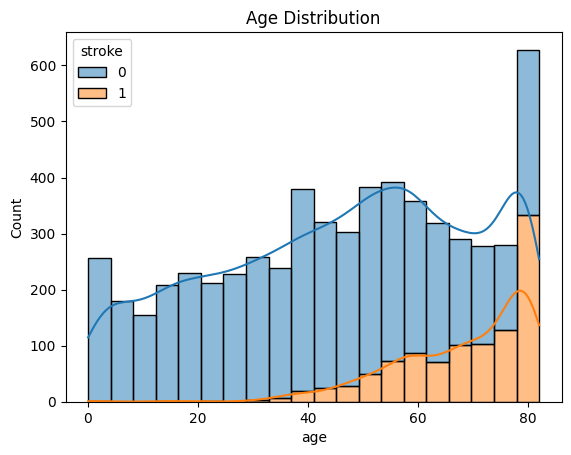

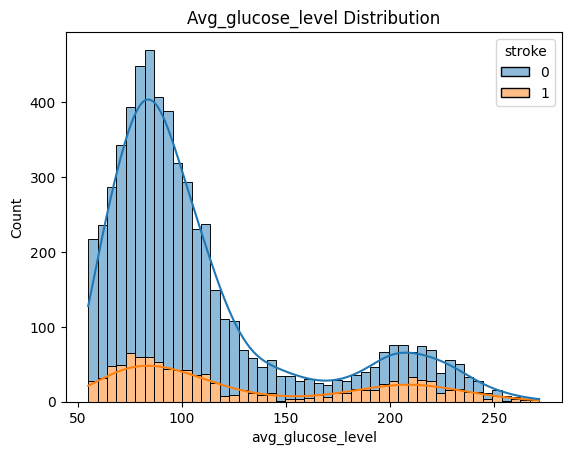

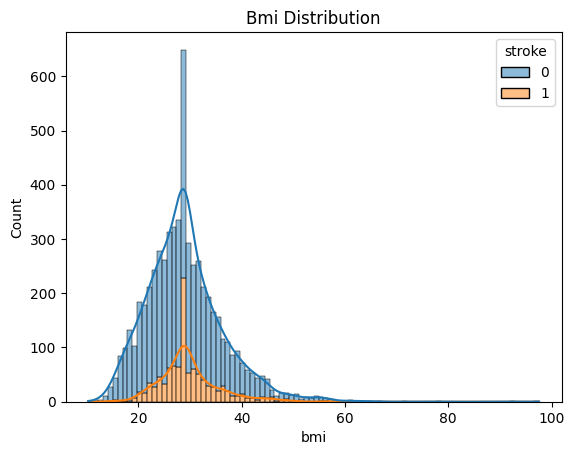

In [ ]:
# Plot Individual Histogram for the numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']
for feature in num_features:
    plt.figure()
    sns.histplot(data=df, x=feature, hue='stroke', kde=True, multiple='stack')
    plt.title(feature.capitalize() + ' Distribution')
    plt.show()

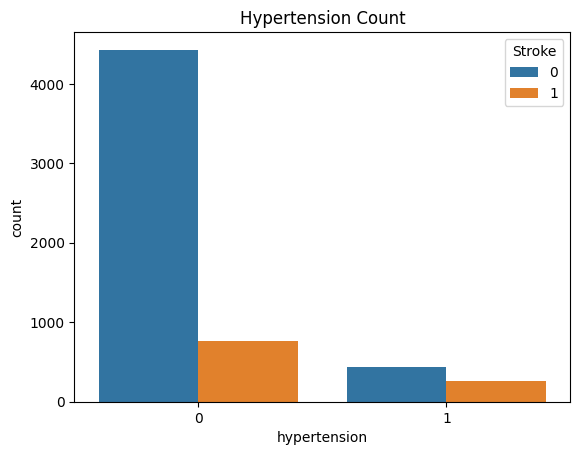

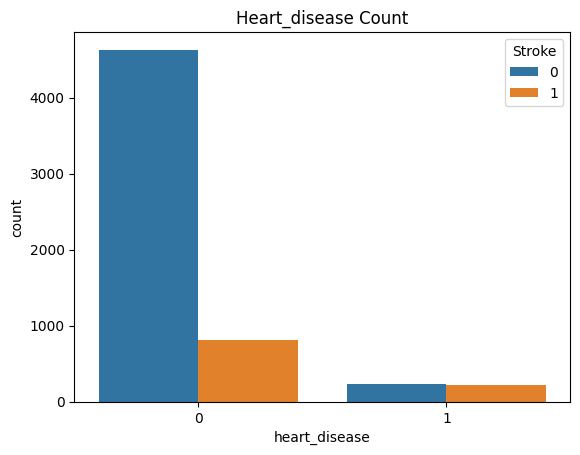

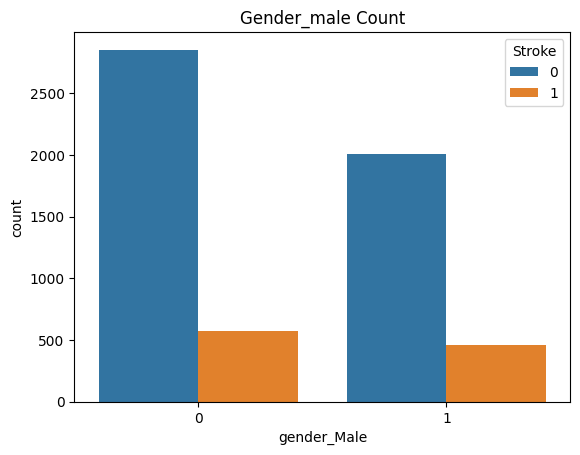

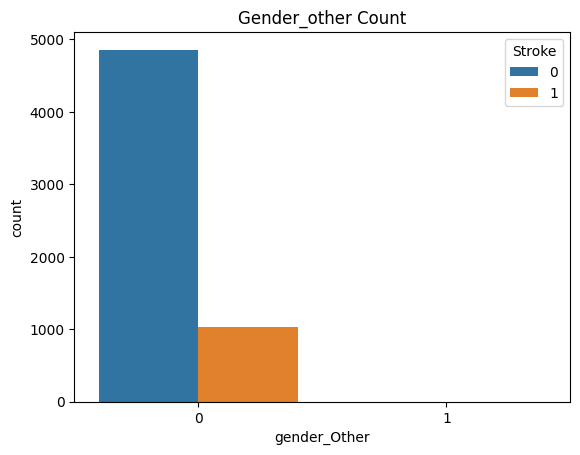

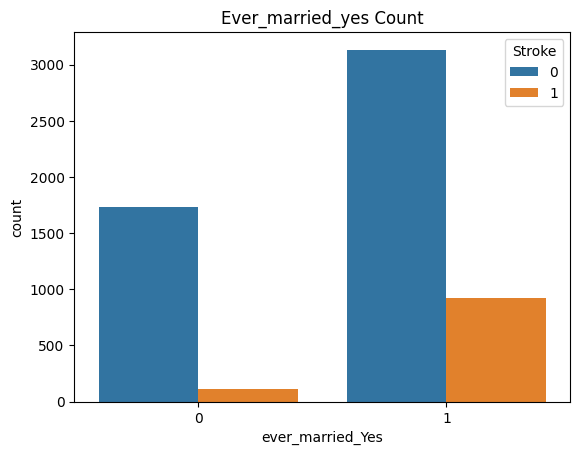

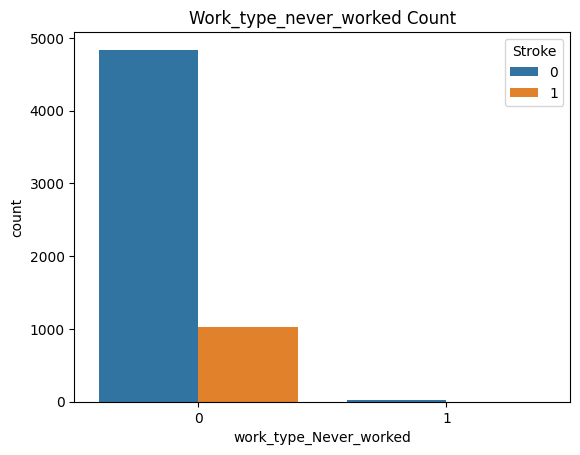

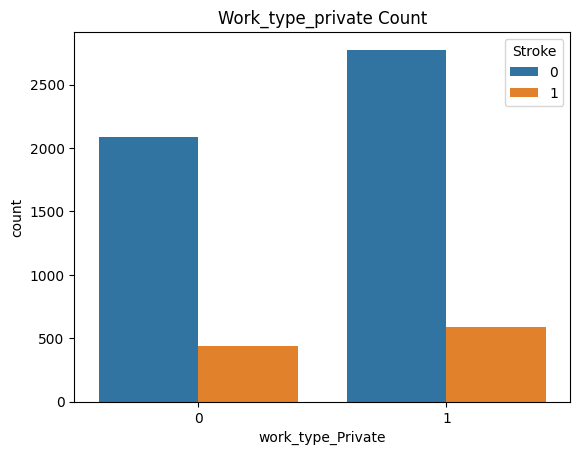

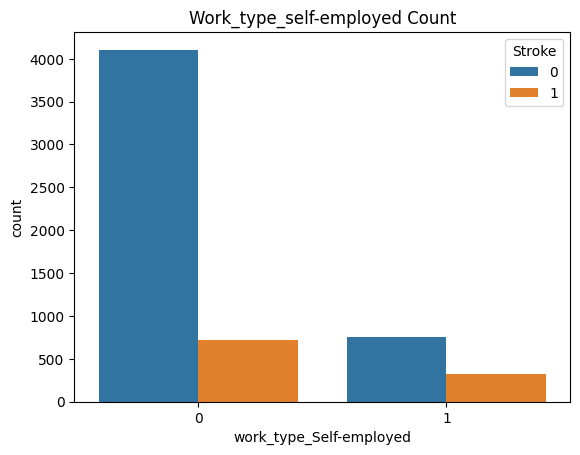

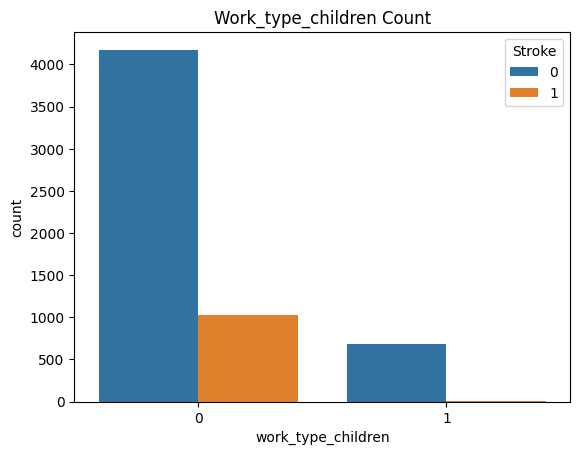

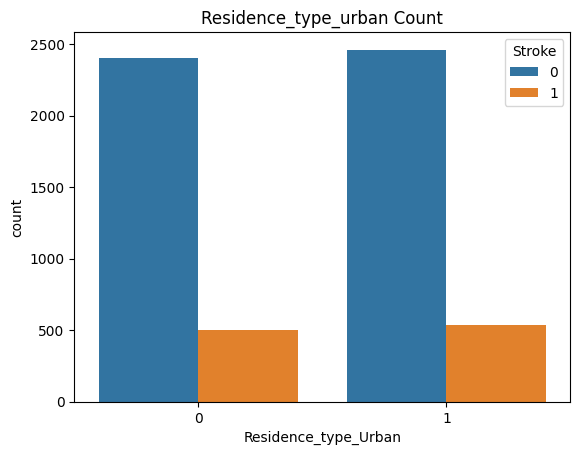

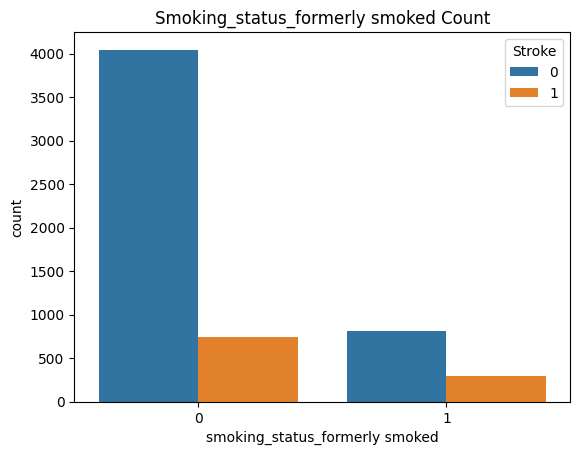

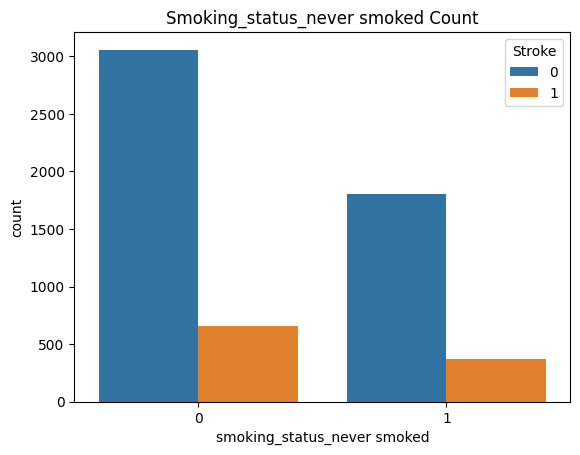

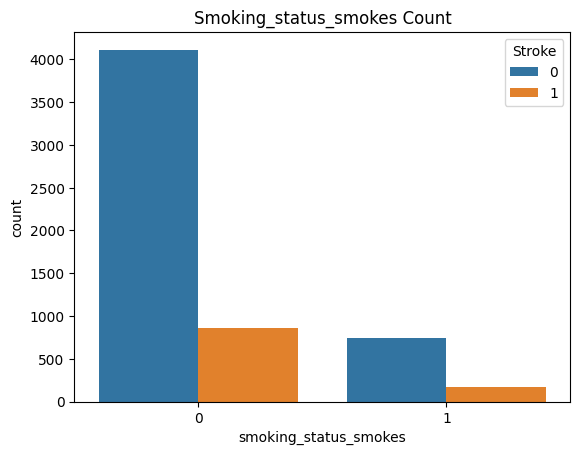

In [ ]:
# Plot individual bar charts for categorical features
import seaborn as sns

#cat_features = ['gender_Male','gender_Other', 'hypertension', 'heart_disease', 'ever_married_1', 'work_type_1',	'work_type_2',
#                'work_type_3',	'work_type_4',	'Residence_type_1',	'smoking_status_1',	'smoking_status_2',	'smoking_status_3' ]

cat_features = ['hypertension', 'heart_disease','gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes']
for feature in cat_features:
    plt.figure()
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature.capitalize() + ' Count')
    plt.legend(title='Stroke', loc='upper right')
    plt.show()

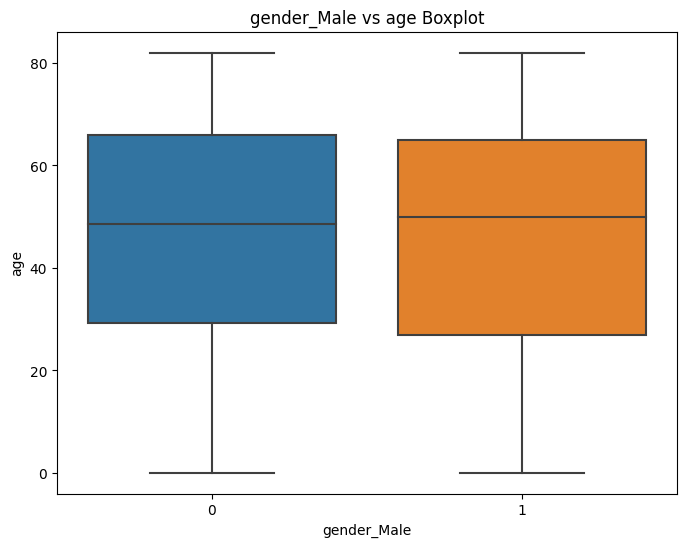

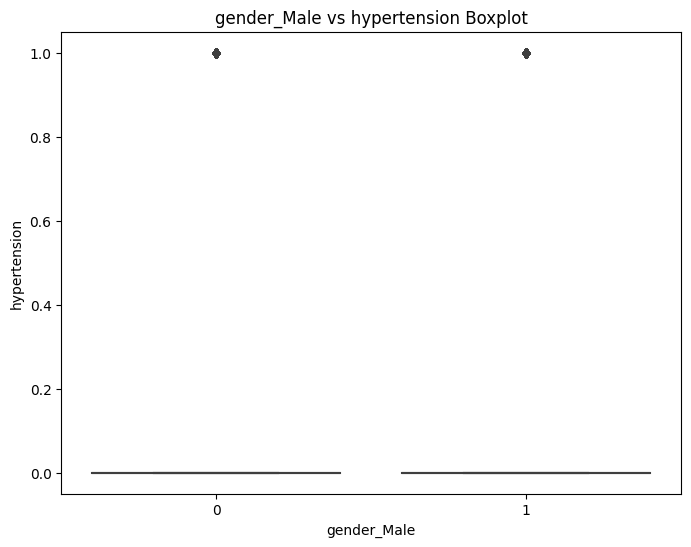

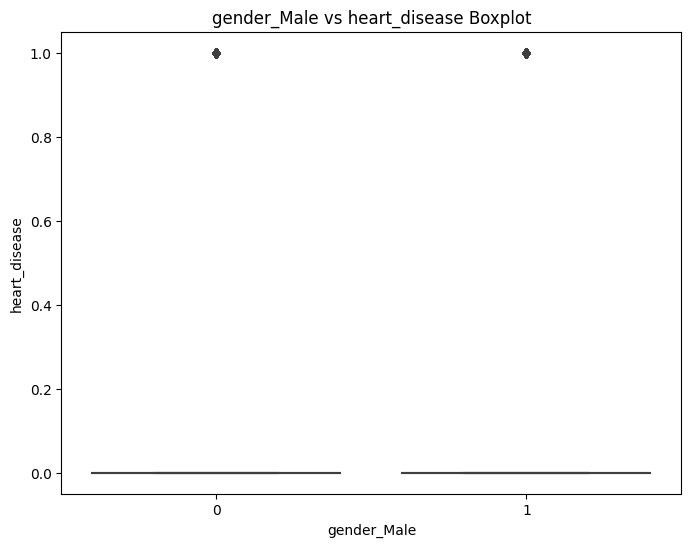

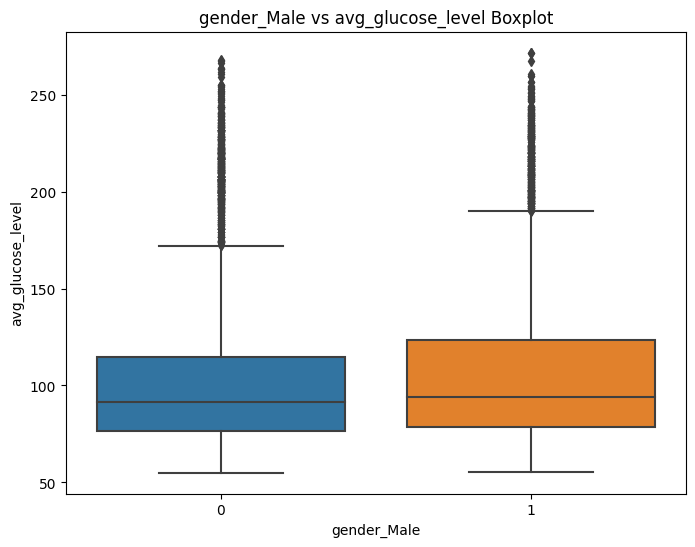

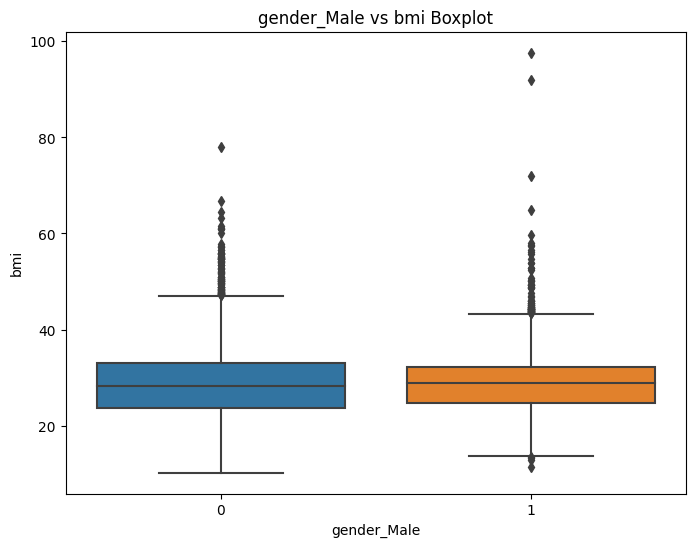

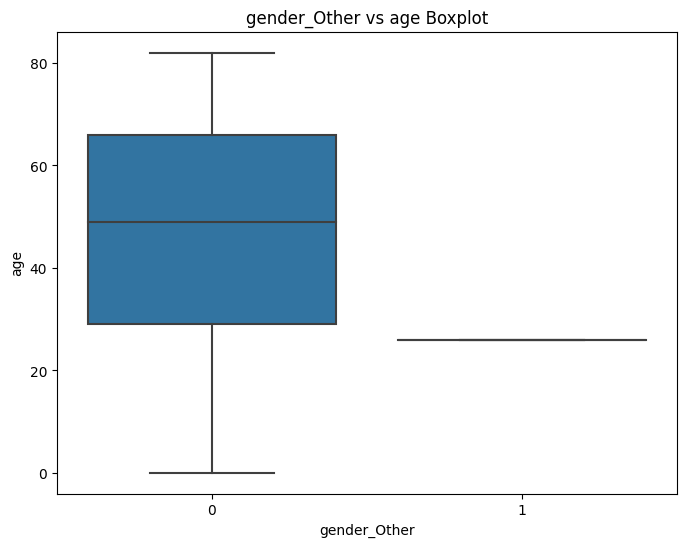

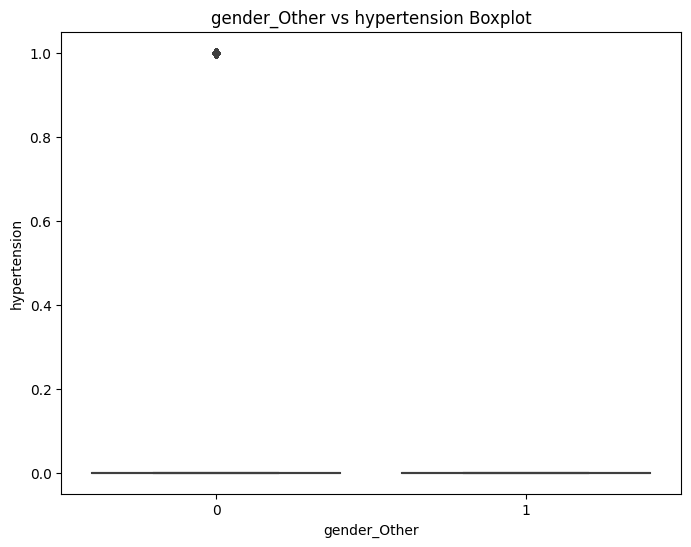

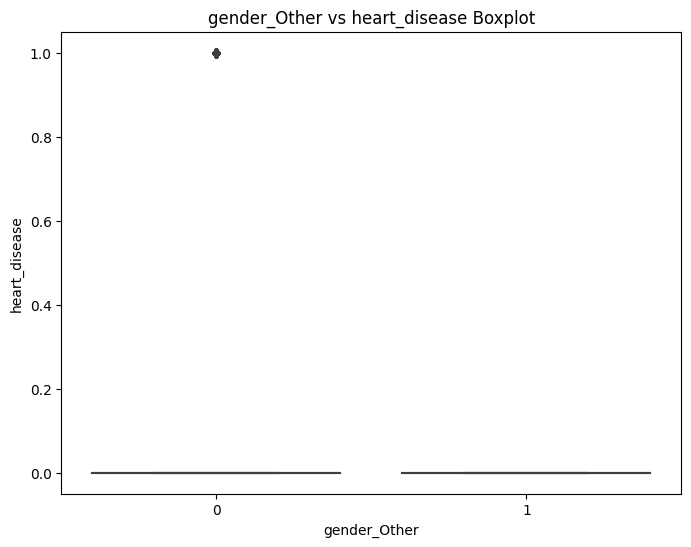

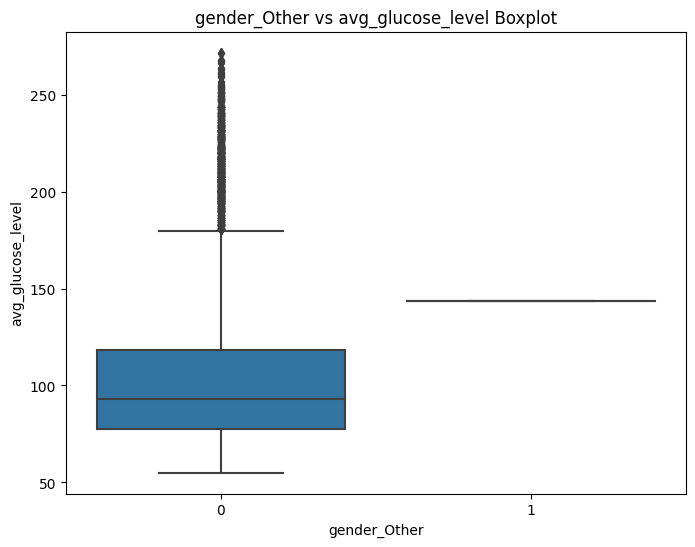

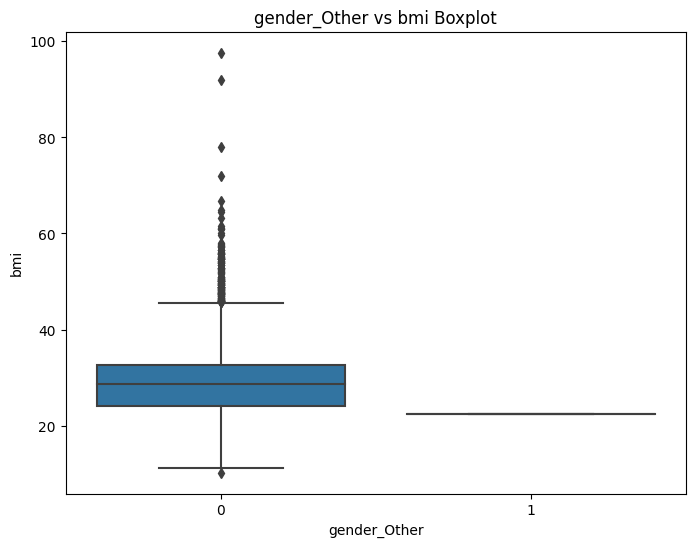

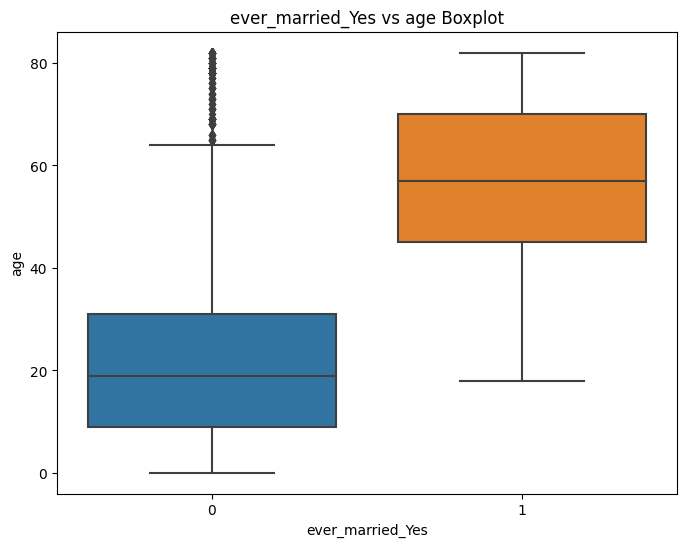

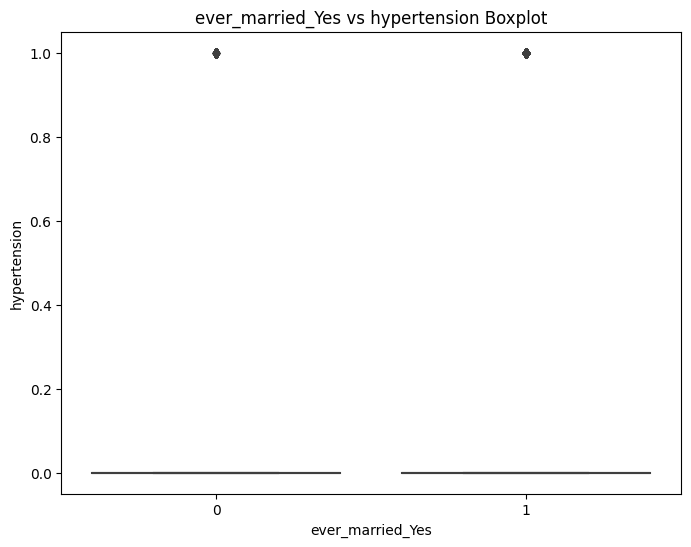

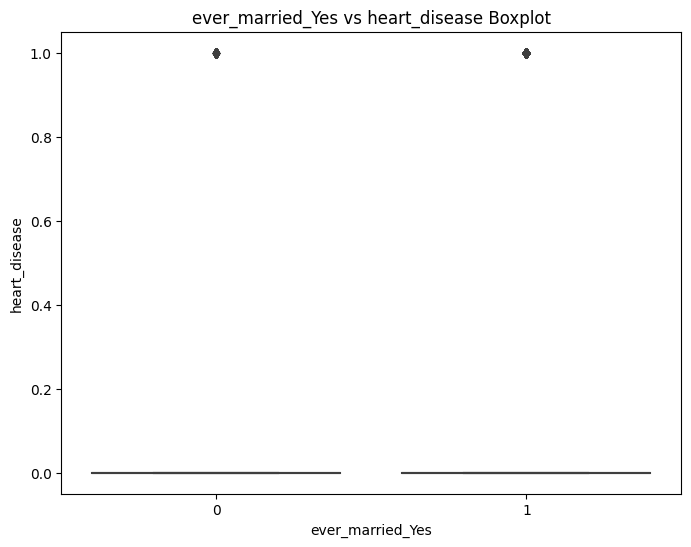

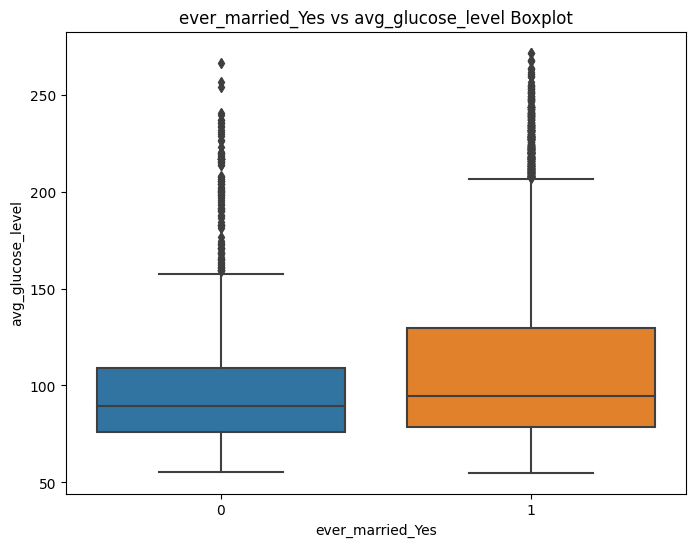

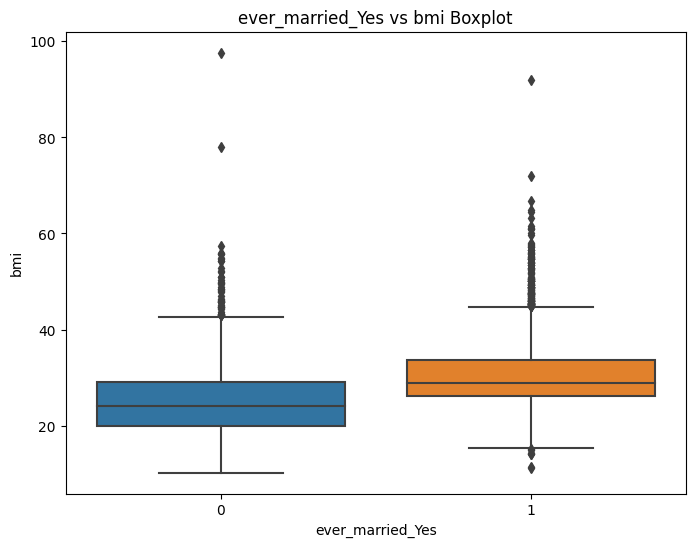

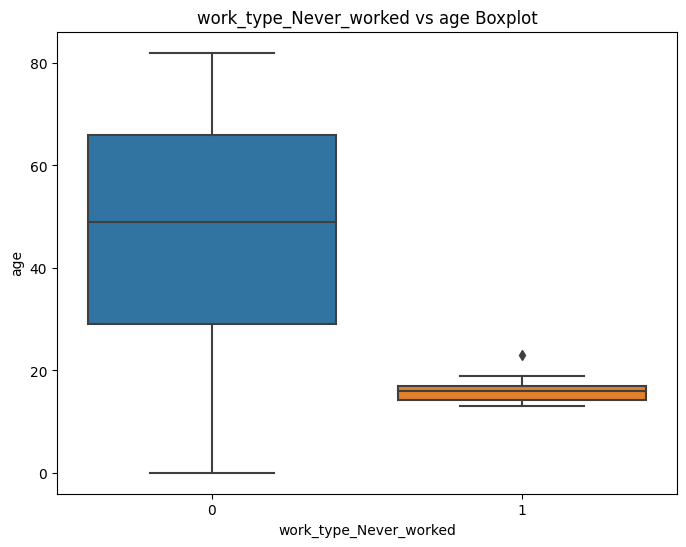

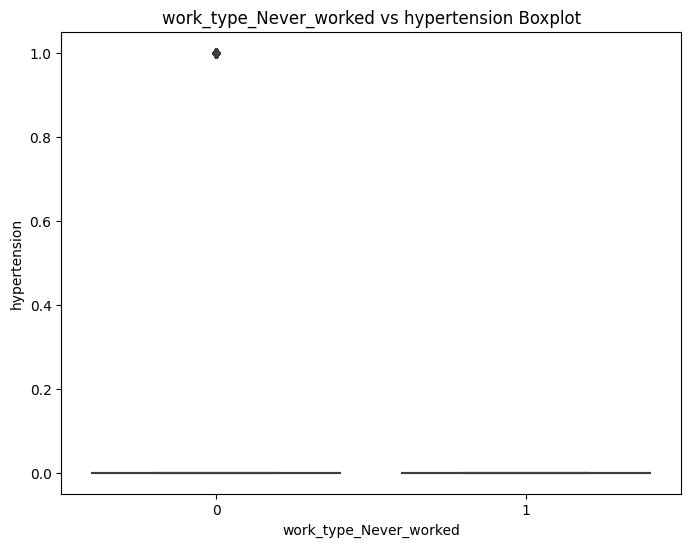

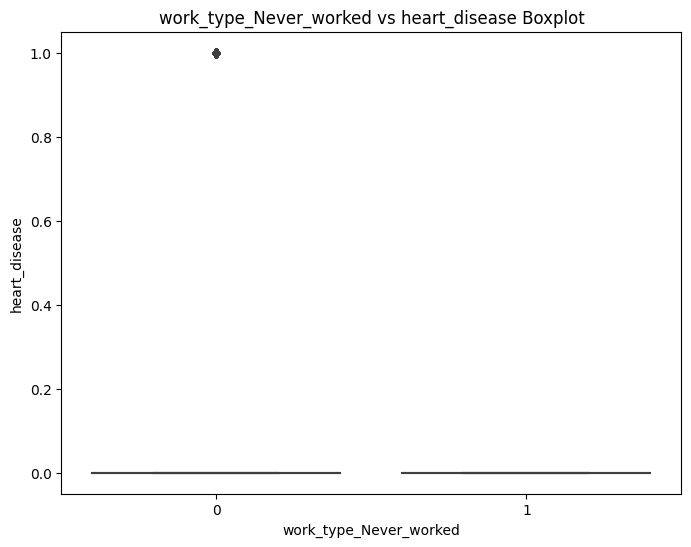

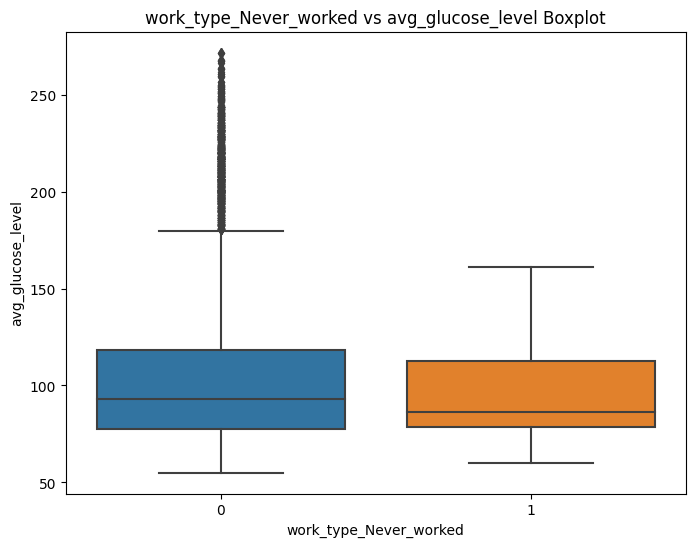

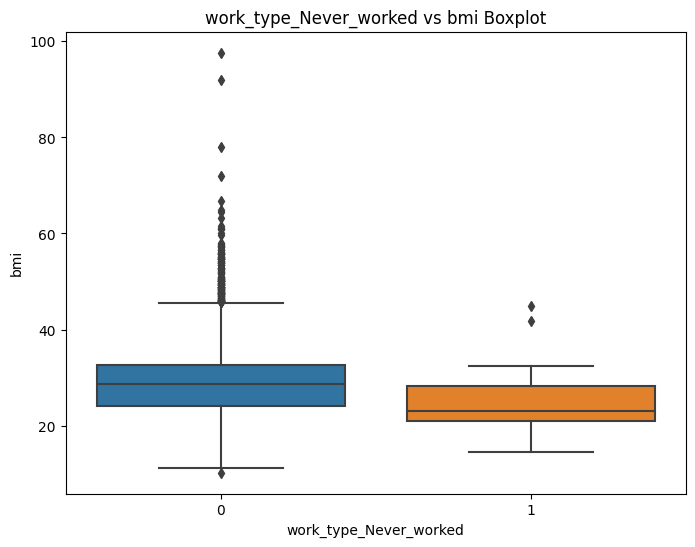

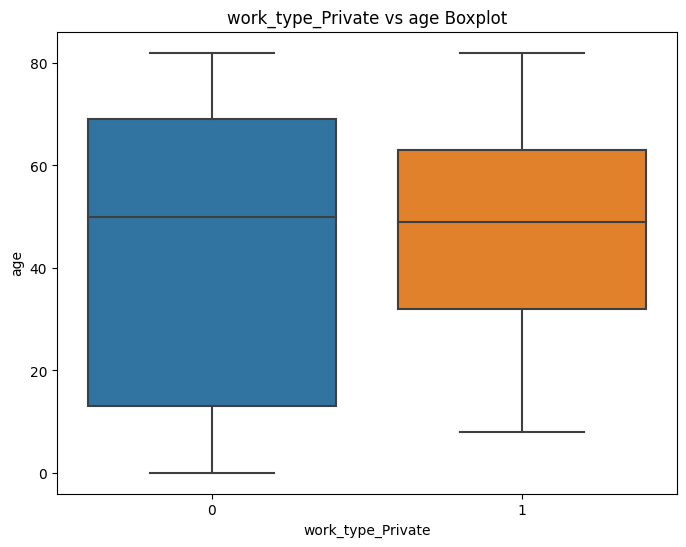

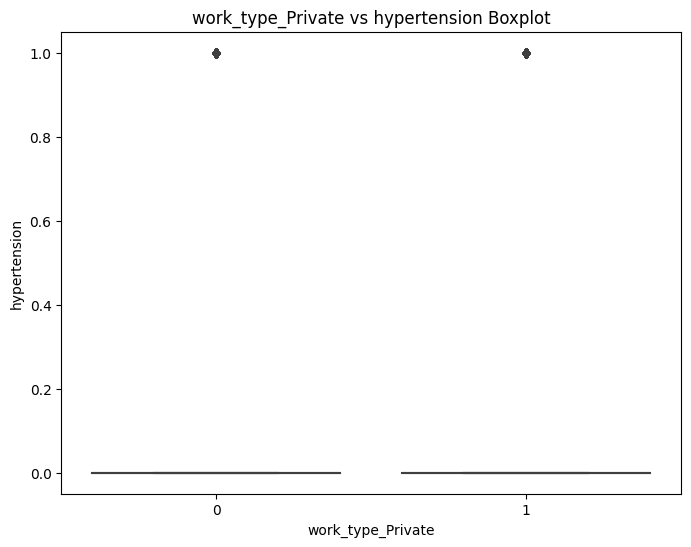

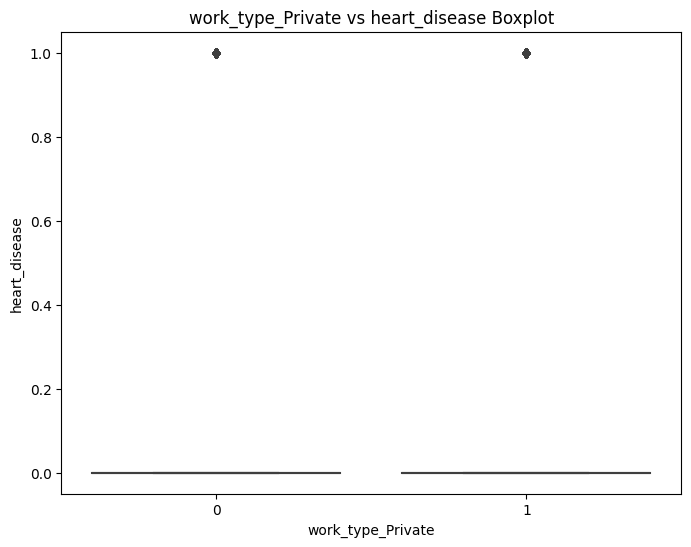

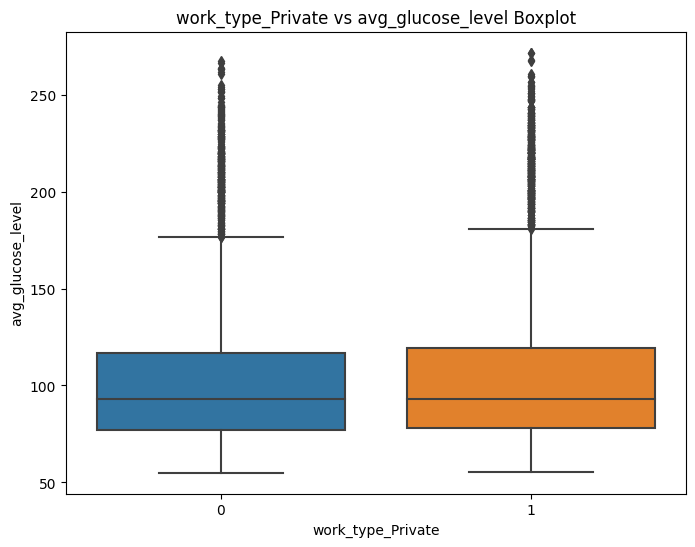

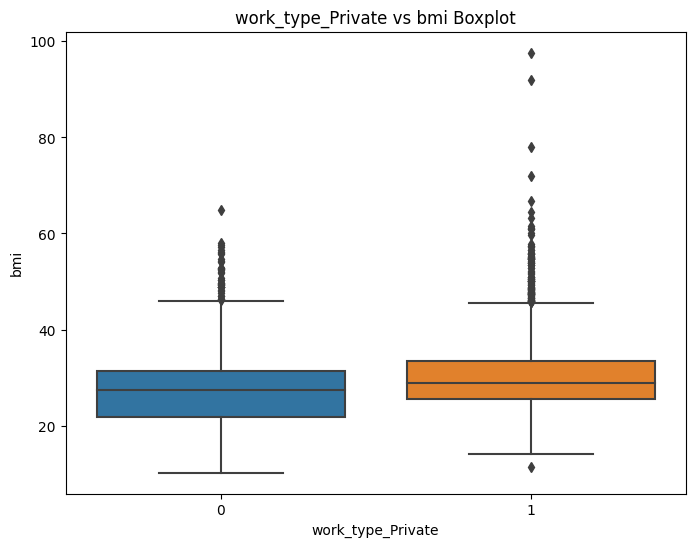

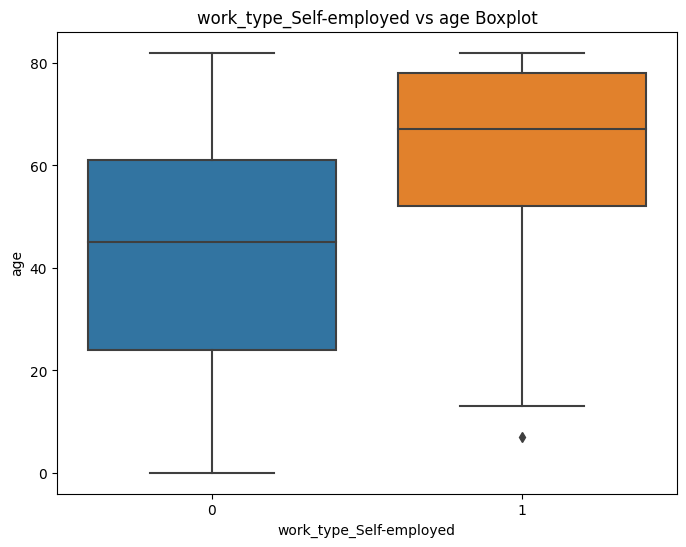

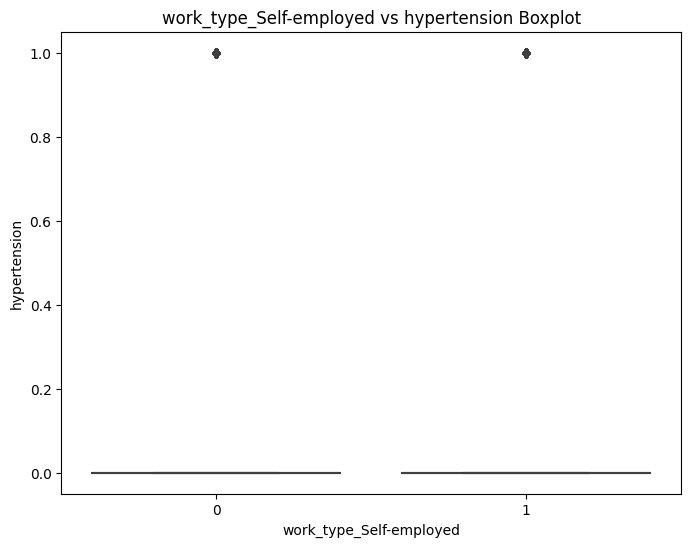

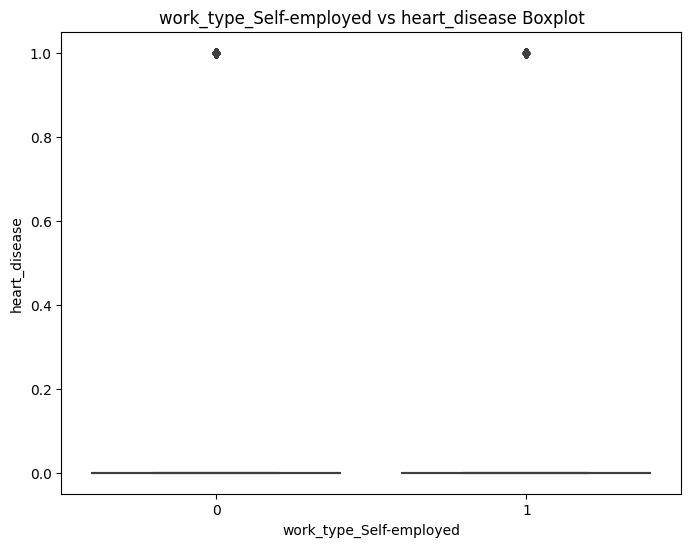

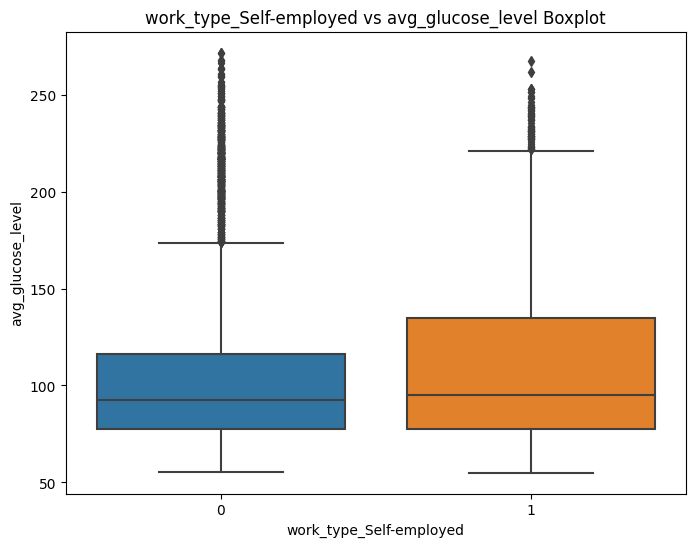

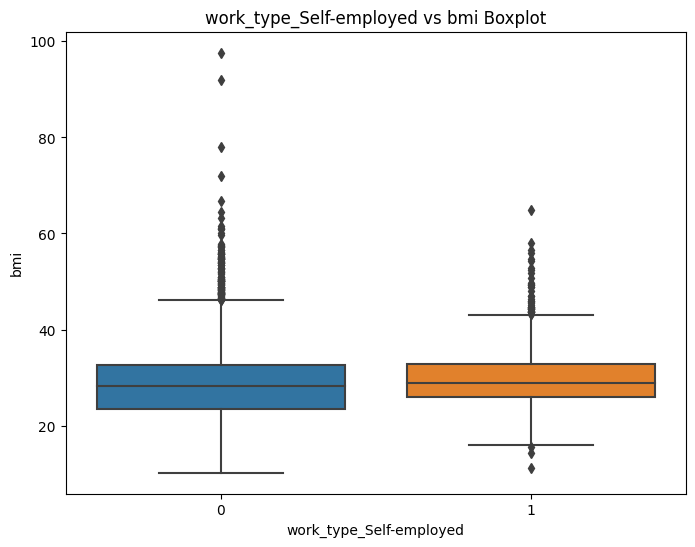

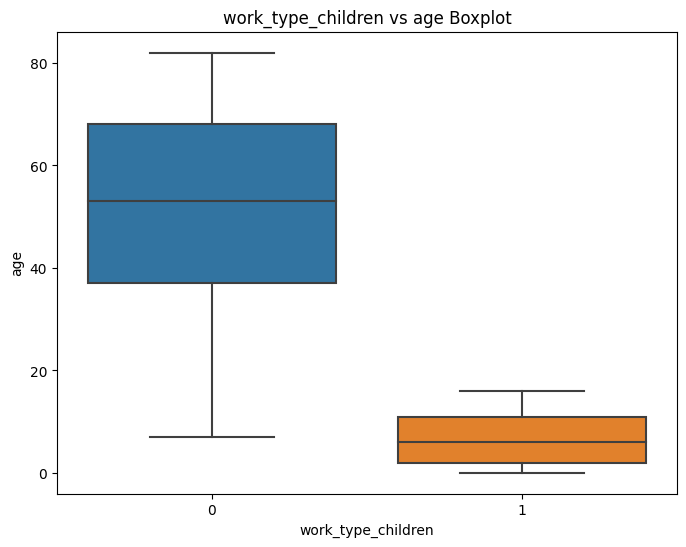

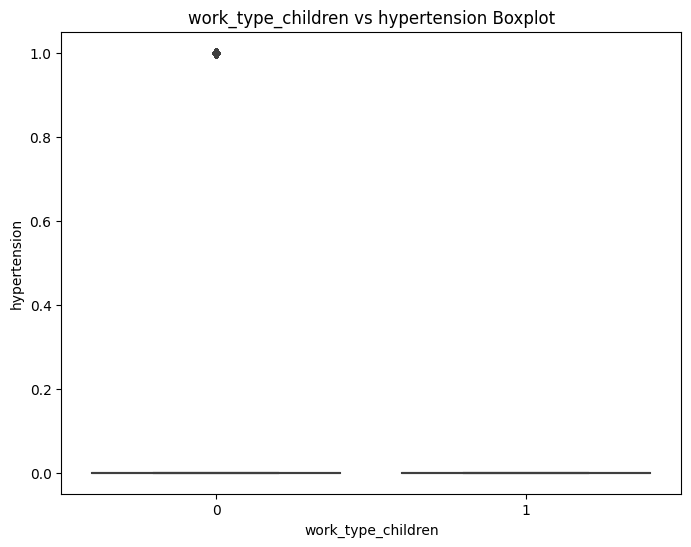

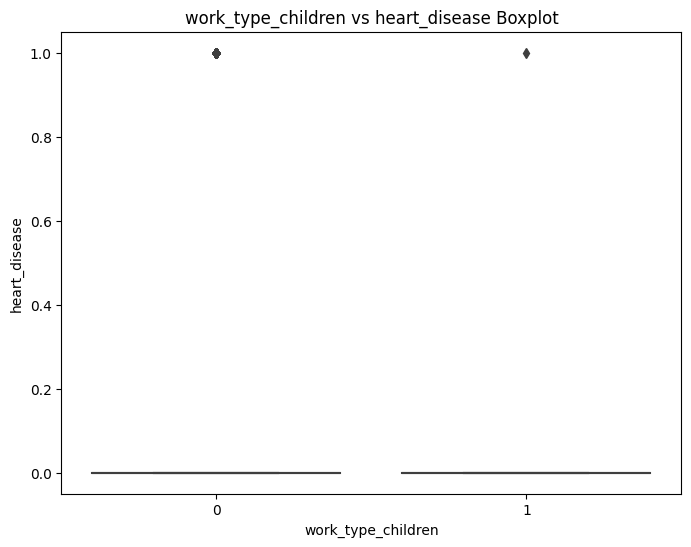

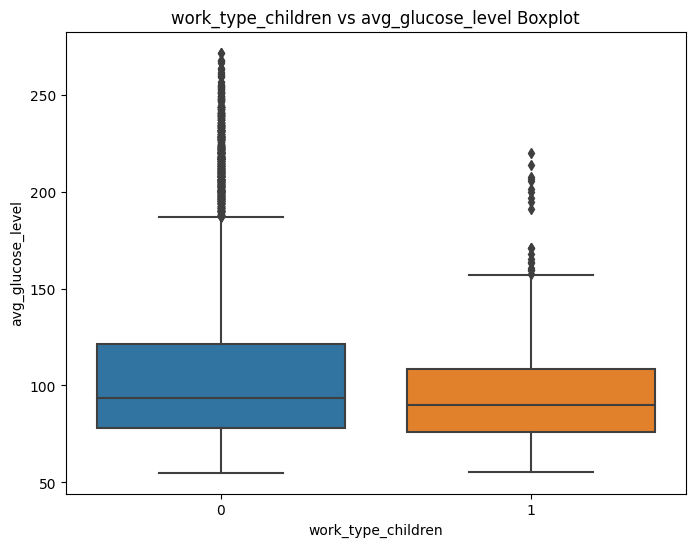

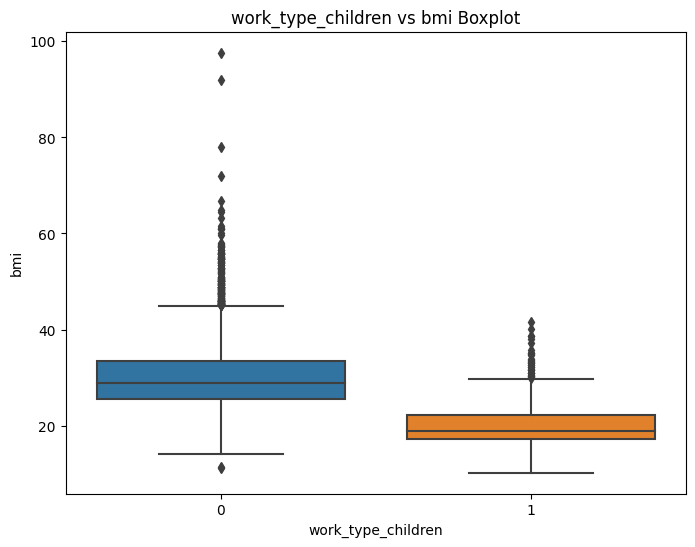

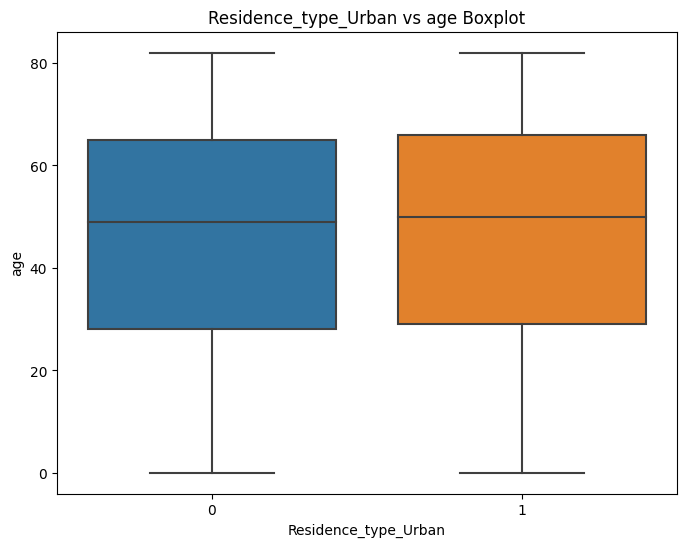

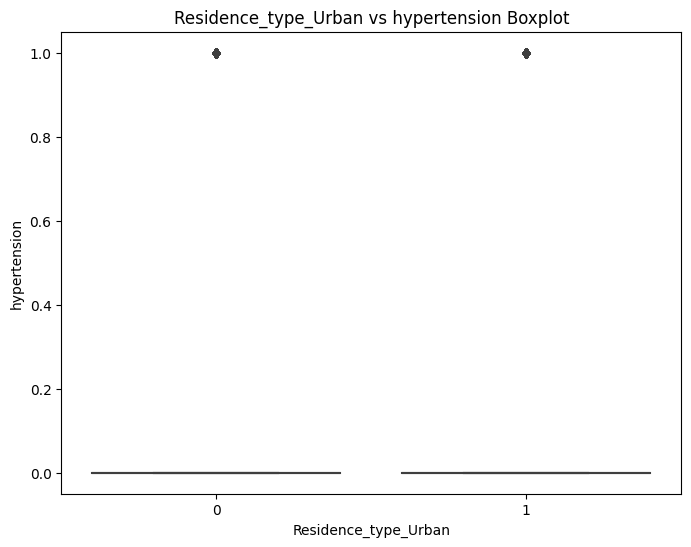

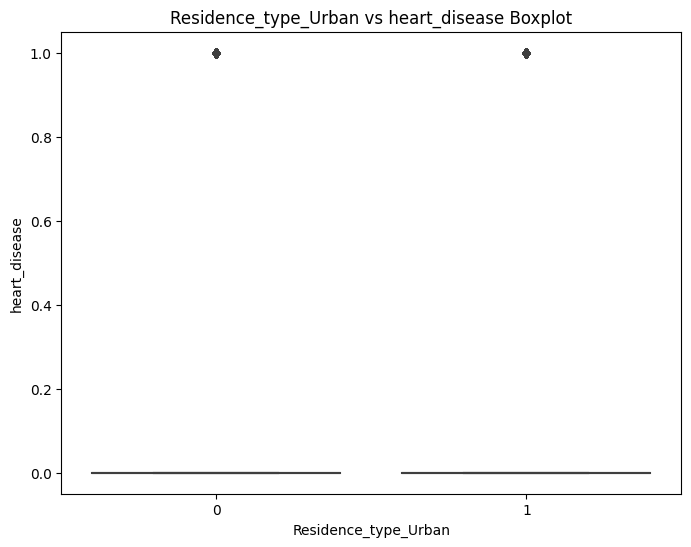

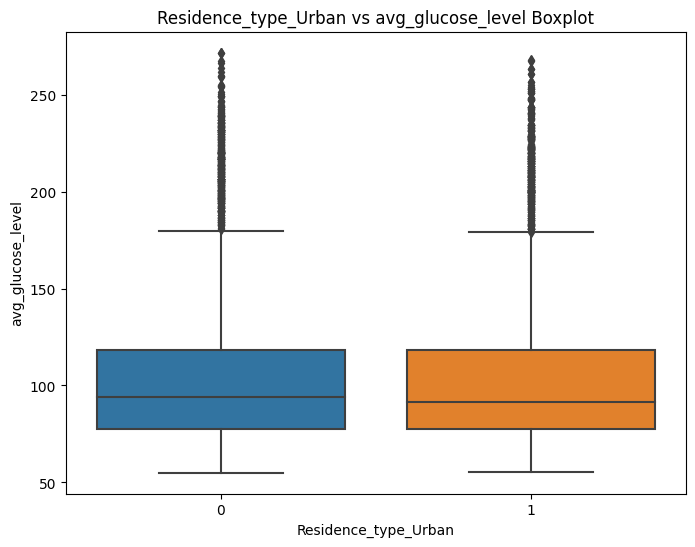

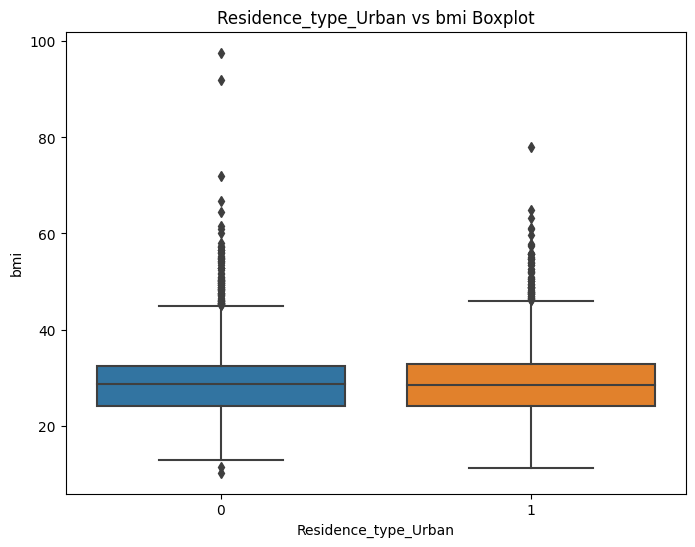

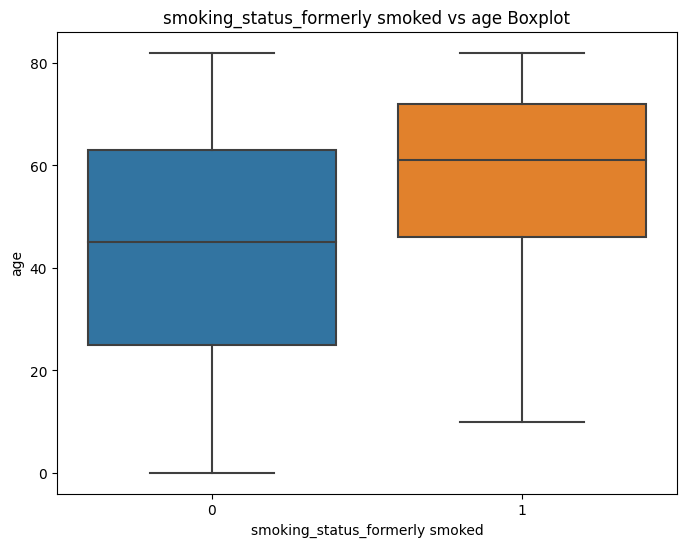

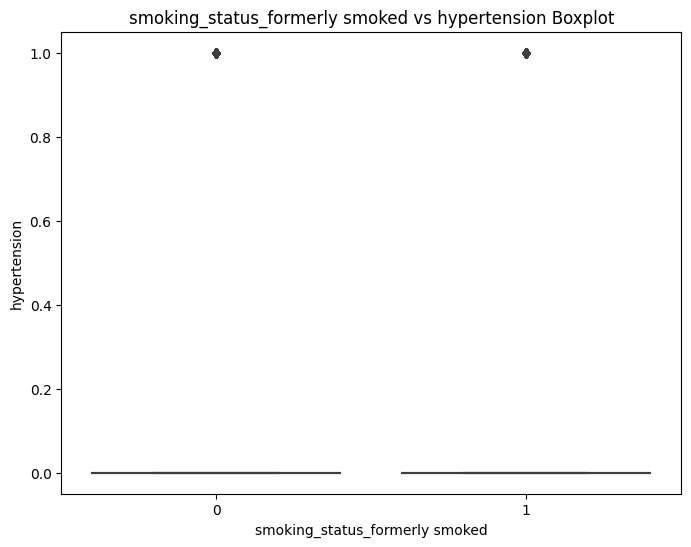

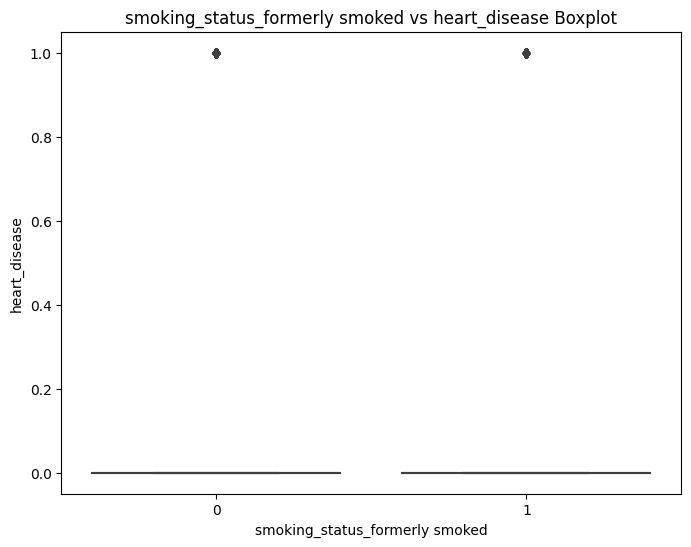

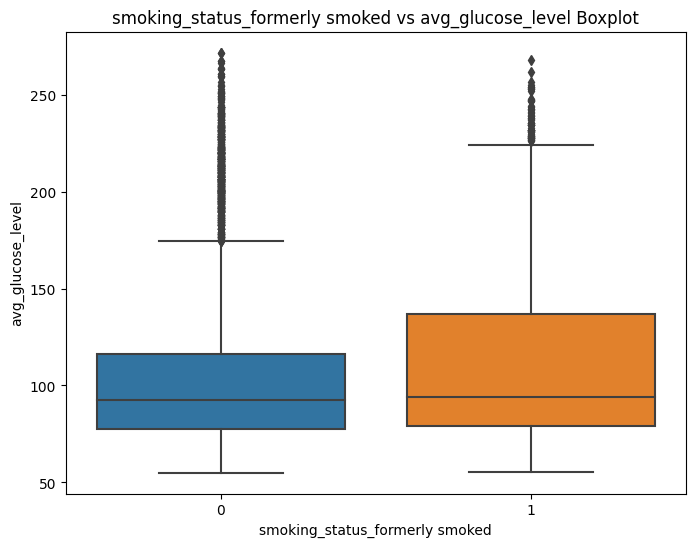

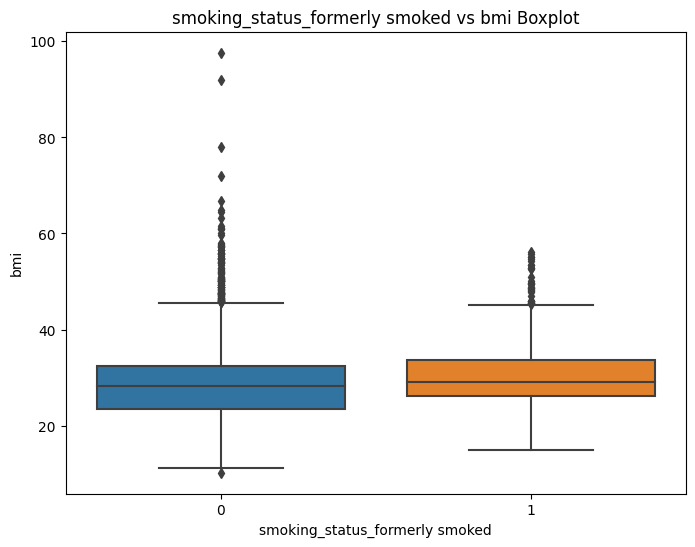

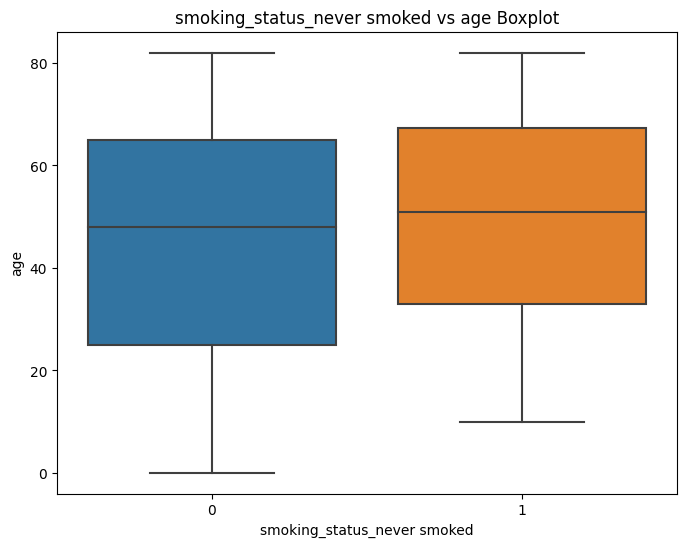

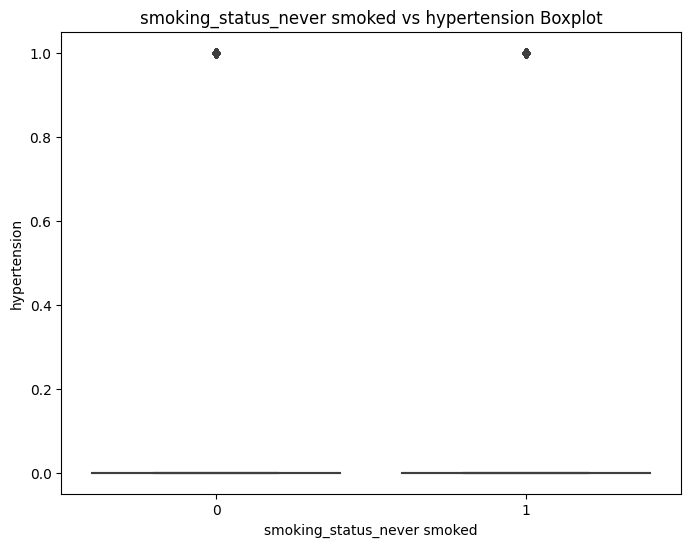

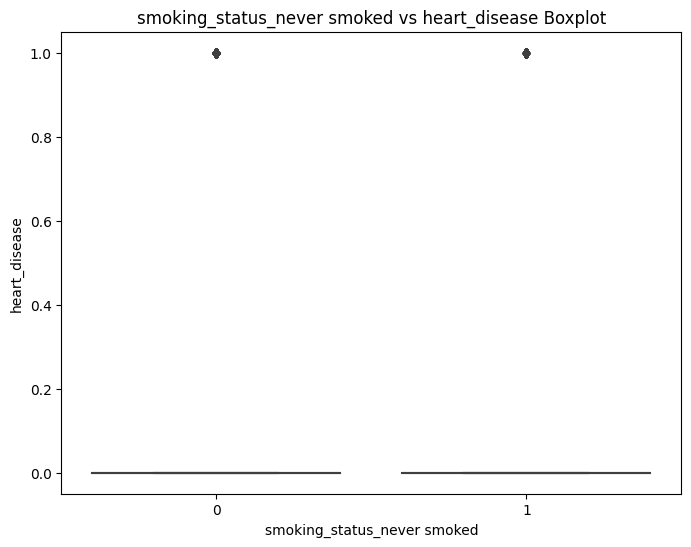

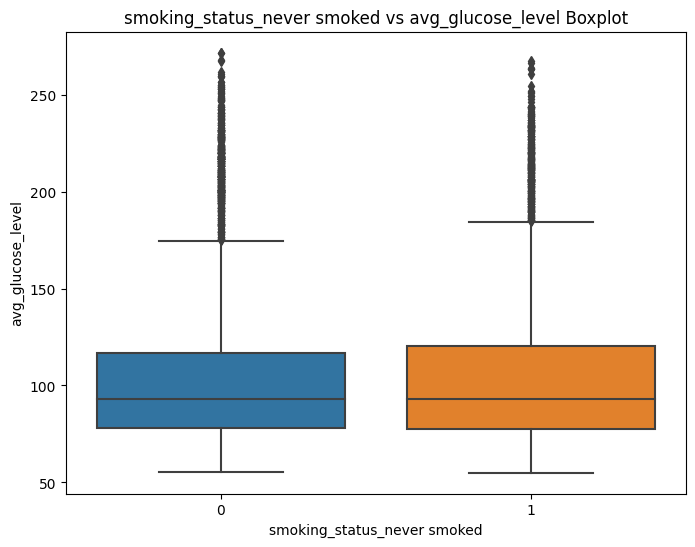

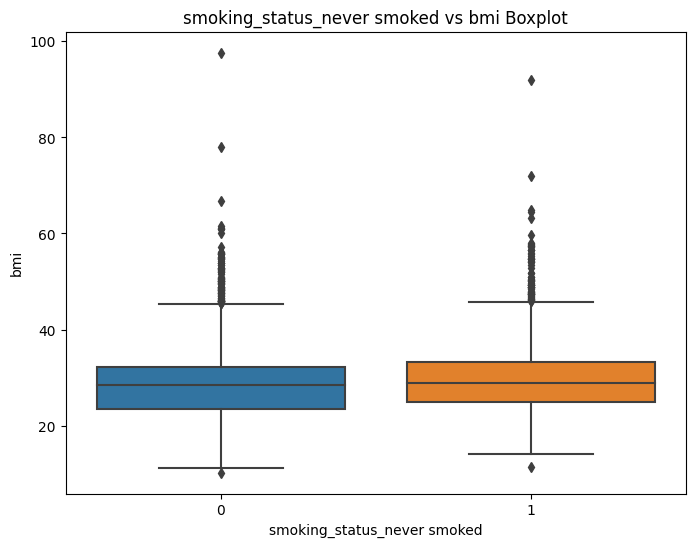

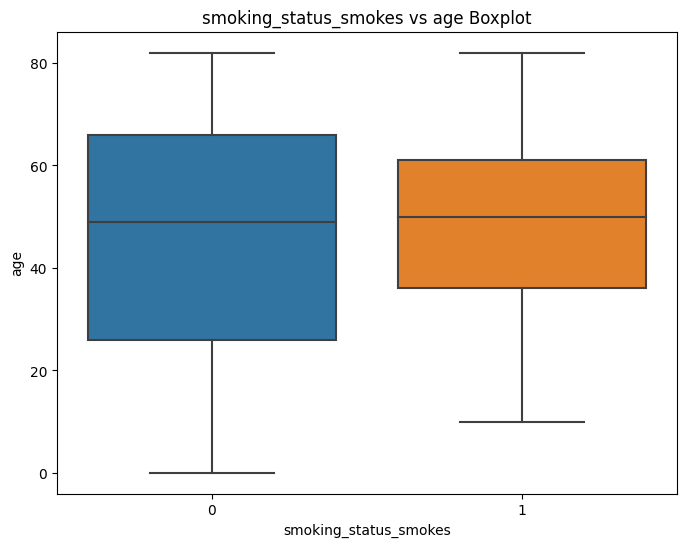

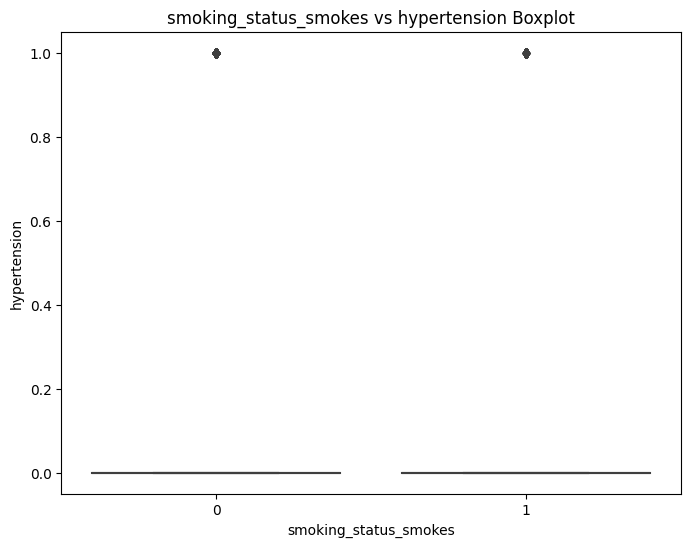

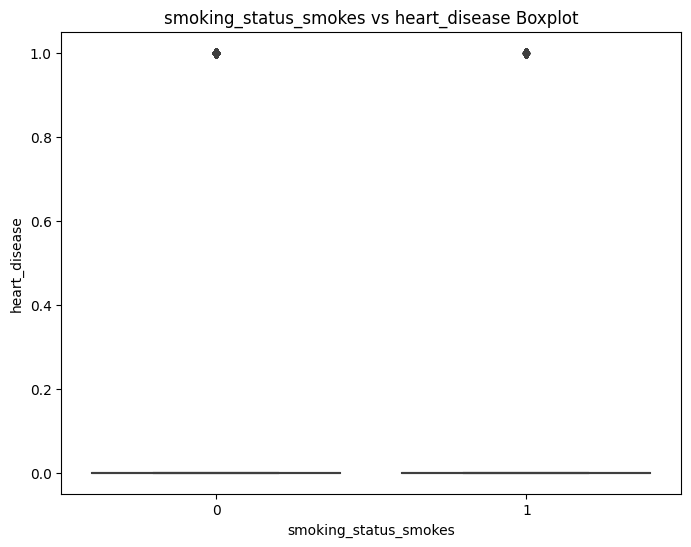

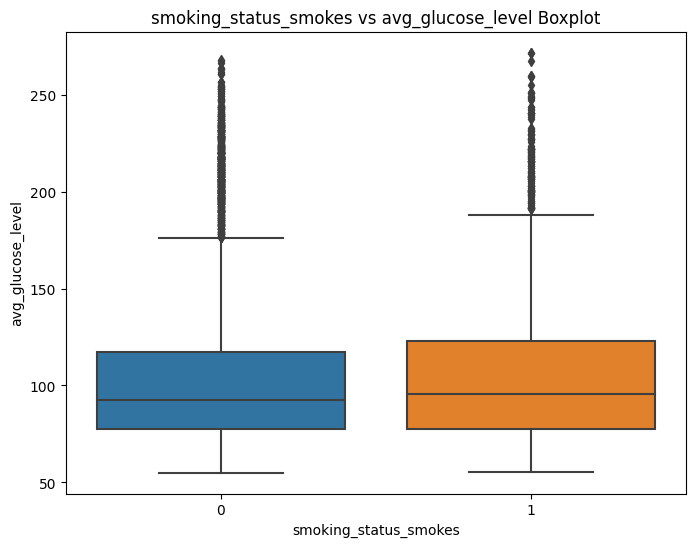

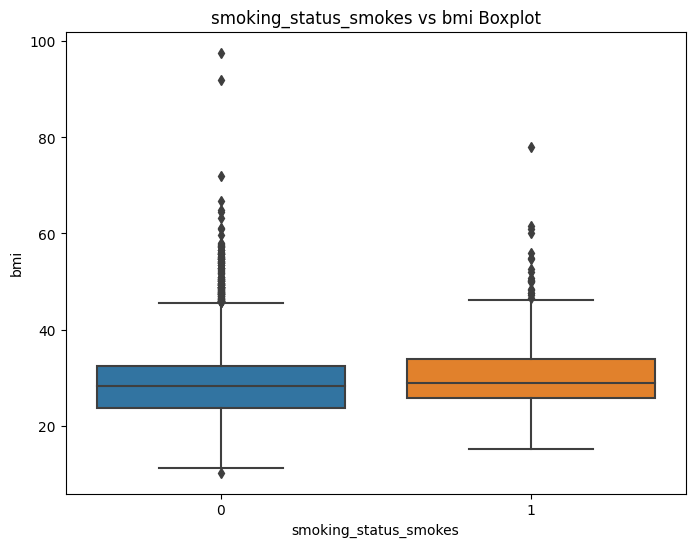

In [ ]:



# Define the categorical and numerical features
categorical_features = ['gender_Male', 'gender_Other', 'ever_married_Yes', 'work_type_Never_worked',
                        'work_type_Private', 'work_type_Self-employed', 'work_type_children',
                        'Residence_type_Urban', 'smoking_status_formerly smoked',
                        'smoking_status_never smoked', 'smoking_status_smokes']

numerical_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

# Plot boxplots for categorical vs numerical features
for cat_feature in categorical_features:
    for num_feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=df, x=cat_feature, y=num_feature)
        plt.title(f'{cat_feature} vs {num_feature} Boxplot')
        plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Apply normalization and standardization for numerical features

num_features = ['age', 'avg_glucose_level', 'bmi']

# Apply Min-Max scaling (normalization) to numerical features
scaler_minmax = MinMaxScaler()
df[num_features] = scaler_minmax.fit_transform(df[num_features])
print('\n\n Data after Min-Max scaling:\n\n')
df.head()



 Data after Min-Max scaling:




age  hypertension  heart_disease  avg_glucose_level       bmi  stroke  \
0  0.816895             0              1           0.801366  0.301260       1   
1  0.743652             0              0           0.679186  0.214274       1   
2  0.975586             0              1           0.234901  0.254296       1   
3  0.597168             0              0           0.536243  0.276060       1   
4  0.963379             1              0           0.549578  0.156930       1   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            1             0                 1                       0   
3            0             0                 1                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  1                        0                   0   
1                  0                        1                   0   
2                  1                        0                   0   
3                  1                        0                   0   
4                  0                        1                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               1   
1                     0                               0   
2                     0                               0   
3                     1                               0   
4                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [ ]:
from sklearn.preprocessing import  StandardScaler

num_features = ['age', 'avg_glucose_level', 'bmi']


# Apply z-score standardization to numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print('\n\n Data after z-score standardization:\n\n')
df.head()



 Data after z-score standardization:




age  hypertension  heart_disease  avg_glucose_level           bmi  \
0  0.884708             0              1           2.482412  1.016106e+00   
1  0.625297             0              0           1.932005 -9.726624e-16   
2  1.446765             0              1          -0.069455  4.675000e-01   
3  0.106475             0              0           1.288062  7.217319e-01   
4  1.403529             1              0           1.348133 -6.698531e-01   

   stroke  gender_Male  gender_Other  ever_married_Yes  \
0       1            1             0                 1   
1       1            0             0                 1   
2       1            1             0                 1   
3       1            0             0                 1   
4       1            0             0                 1   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                       0                  1                        0   
1                       0                  0                        1   
2                       0                  1                        0   
3                       0                  1                        0   
4                       0                  0                        1   

   work_type_children  Residence_type_Urban  smoking_status_formerly smoked  \
0                   0                     1                               1   
1                   0                     0                               0   
2                   0                     0                               0   
3                   0                     1                               0   
4                   0                     0                               0   

   smoking_status_never smoked  smoking_status_smokes  
0                            0                      0  
1                            1                      0  
2                            1                      0  
3                            0                      1  
4                            1                      0

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE technique
smt = SMOTE(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)
print('\n\nAfter SMOTE technique:\n\n', y_resampled.value_counts())

# # Create a new DataFrame with resampled data
df_smote = pd.DataFrame(X_resampled, columns=X.columns)
df_smote['stroke'] = y_resampled

# Apply Random Over Sampling technique
ros = RandomOverSampler(random_state=42)
X_resampled2, y_resampled2 = ros.fit_resample(X_resampled, y_resampled)
print('\n\nAfter Random Over Sampling:\n\n', y_resampled2.value_counts())

# # Create a new DataFrame with resampled data
df_ros = pd.DataFrame(X_resampled2, columns=X.columns)
df_ros['stroke'] = y_resampled2

df = pd.concat([df_smote, df_ros])


# # Apply Random Under Sampling technique
# rus = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
# print('\n\nAfter Random Under Sampling:\n\n', y_resampled.value_counts())

# # Create a new DataFrame with resampled data
# df = pd.DataFrame(X_resampled2, columns=X.columns)
# df['stroke'] = y_resampled2



After SMOTE technique:

 0    3910
1    3910
Name: stroke, dtype: int64


After Random Over Sampling:

 0    3910
1    3910
Name: stroke, dtype: int64


In [ ]:
# Check the class distribution
print(df['stroke'].value_counts())

0    7820
1    7820
Name: stroke, dtype: int64


In [ ]:
df.head()

age  hypertension  heart_disease  avg_glucose_level       bmi  \
0 -0.196171             0              0          -0.482052 -0.228292   
1 -0.585287             0              0           0.076461  1.872466   
2 -1.449990             0              0           0.462452  1.698518   
3 -1.406755             0              0          -0.911486 -1.271981   
4  1.317059             0              0          -0.197080  1.203434   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0            1             0                 1                       0   
1            0             0                 1                       0   
2            0             0                 0                       0   
3            0             0                 0                       0   
4            0             0                 1                       0   

   work_type_Private  work_type_Self-employed  work_type_children  \
0                  0                        1                   0   
1                  0                        1                   0   
2                  0                        0                   1   
3                  0                        0                   1   
4                  1                        0                   0   

   Residence_type_Urban  smoking_status_formerly smoked  \
0                     1                               0   
1                     0                               0   
2                     1                               0   
3                     0                               0   
4                     1                               0   

   smoking_status_never smoked  smoking_status_smokes  stroke  
0                            0                      0       0  
1                            1                      0       0  
2                            1                      0       0  
3                            0                      0       0  
4                            1                      0       0

<Axes: xlabel='stroke', ylabel='count'>

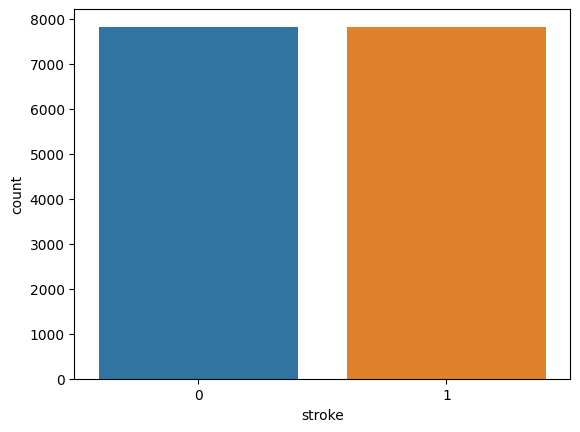

In [ ]:
sns.countplot(x='stroke', data=df)

In [ ]:
pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 78.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a87e2cea08a544079f8f33ba5f9f30ecdf1d26dd1338f69efcf00d349c94a4e3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [ ]:
import pandas_profiling


# Generate pandas profiling report
profile = df.profile_report(title="Stroke Prediction Dataset Profile")

# Save the report as an HTML file
profile.to_file("stroke_prediction_dataset_profile.html")

<ipython-input-25-24402d613dff>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/multimethod/__init__.py:315: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  return func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas_profiling/model/correlations.py:67: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'cannot reindex on an axis with duplicate labels')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print(os.getcwd())

/content


In [ ]:
profile.to_file("/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from IPython.display import display, HTML

# Specify the path to the HTML file
html_file = '/content/drive/MyDrive/CSE445/stroke_prediction_dataset_profile.html'

# Display the HTML file
display(HTML(filename=html_file))

In [ ]:
# Separate features and target variable
X_resampled = df.drop('stroke', axis=1)
y_resampled = df['stroke']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Apply stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Verify the class distribution in the stratified datasets
print("Original Class Distribution:")
print(y.value_counts(normalize=True))
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))
print("Test Set Class Distribution:")
print(y_test.value_counts(normalize=True))

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

Original Class Distribution:
0    0.5
1    0.5
Name: stroke, dtype: float64
Training Set Class Distribution:
1    0.5
0    0.5
Name: stroke, dtype: float64
Test Set Class Distribution:
1    0.5
0    0.5
Name: stroke, dtype: float64


In [ ]:
X_train

age  hypertension  heart_disease  avg_glucose_level           bmi  \
1979 -1.709401             0              0           0.115538  5.745450e-01   
462   0.538827             0              0          -0.478726  1.329844e-01   
625  -1.882342             0              0          -0.902340 -1.606497e+00   
3297  1.273824             0              1          -0.627968 -9.726624e-16   
1726 -1.449990             0              0          -0.524455 -4.959050e-01   
...        ...           ...            ...                ...           ...   
5191  0.632346             0              0           1.884880  1.225626e-01   
5598  0.979328             1              0           0.030640  3.350251e-01   
5390  0.183652             0              0          -0.857490  4.161673e-02   
860   0.582062             0              0          -0.825848 -3.754793e-01   
7270  1.411694             0              0          -0.563981  1.952944e-01   

      gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
1979            0             0                 0                       0   
462             1             0                 1                       0   
625             1             0                 0                       0   
3297            1             0                 1                       0   
1726            0             0                 0                       0   
...           ...           ...               ...                     ...   
5191            1             0                 1                       0   
5598            0             0                 1                       0   
5390            1             0                 0                       0   
860             1             0                 1                       0   
7270            1             0                 1                       0   

      work_type_Private  work_type_Self-employed  work_type_children  \
1979                  0                        0                   1   
462                   1                        0                   0   
625                   0                        0                   1   
3297                  1                        0                   0   
1726                  0                        0                   1   
...                 ...                      ...                 ...   
5191                  1                        0                   0   
5598                  0                        0                   0   
5390                  1                        0                   0   
860                   0                        1                   0   
7270                  1                        0                   0   

      Residence_type_Urban  smoking_status_formerly smoked  \
1979                     0                               0   
462                      1                               1   
625                      0                               0   
3297                     1                               0   
1726                     1                               0   
...                    ...                             ...   
5191                     1                               0   
5598                     0                               1   
5390                     0                               0   
860                      1                               0   
7270                     1                               0   

      smoking_status_never smoked  smoking_status_smokes  
1979                            0                      0  
462                             0                      0  
625                             0                      0  
3297                            0                      0  
1726                            0                      0  
...                           ...                    ...  
5191                            0                      0  
5598                            0          

In [ ]:
y_train

1979    0
462     1
625     0
3297    0
1726    0
       ..
5191    1
5598    1
5390    1
860     0
7270    1
Name: stroke, Length: 9384, dtype: int64

In [ ]:
X_train.value_counts()

age        hypertension  heart_disease  avg_glucose_level  bmi            gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  work_type_Private  work_type_Self-employed  work_type_children  Residence_type_Urban  smoking_status_formerly smoked  smoking_status_never smoked  smoking_status_smokes
 0.625297  0             1               0.052973          -2.282925e-01  1            0             1                 0                       1                  0                        0                   0                     0                               0                            1                        12
 0.106475  0             0              -0.091488           3.872163e-01  1            0             0                 0                       1                  0                        0                   0                     0                               0                            1                        11
 0.236181  1             0               2.578026   

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
kneighbors_classifier = KNeighborsClassifier()
naive_bayes = GaussianNB()
svm = SVC()
gradient_boosting = GradientBoostingClassifier()


# Train the models
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
kneighbors_classifier.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
svm.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)


# Make predictions on the test set
lr_predictions = logistic_regression.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)
kc_predictions = kneighbors_classifier.predict(X_test)
nb_y_pred = naive_bayes.predict(X_test)
svm_y_pred = svm.predict(X_test)
gb_y_pred = gradient_boosting.predict(X_test)


In [ ]:
# Evaluate model performance

lr_accuracy1 = logistic_regression.score(X_train, y_train)
lr_accuracy2 = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

dt_accuracy1 = decision_tree.score(X_train, y_train)
dt_accuracy2 = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

rf_accuracy1 = random_forest.score(X_train, y_train)
rf_accuracy2 = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

kc_accuracy1 = kneighbors_classifier.score(X_train, y_train)
kc_accuracy2 = accuracy_score(y_test, kc_predictions)
kc_precision = precision_score(y_test, kc_predictions)
kc_recall = recall_score(y_test, kc_predictions)
kc_f1 = f1_score(y_test, kc_predictions)

nb_accuracy1 = naive_bayes.score(X_train, y_train)
nb_accuracy2 = accuracy_score(y_test, nb_y_pred)
nb_precision = precision_score(y_test, nb_y_pred)
nb_recall = recall_score(y_test, nb_y_pred)
nb_f1 = f1_score(y_test, nb_y_pred)

svm_accuracy1 = svm.score(X_train, y_train)
svm_accuracy2 = accuracy_score(y_test, svm_y_pred)
svm_precision = precision_score(y_test, svm_y_pred)
svm_recall = recall_score(y_test, svm_y_pred)
svm_f1 = f1_score(y_test, svm_y_pred)

gb_accuracy1 = gradient_boosting.score(X_train, y_train)
gb_accuracy2 = accuracy_score(y_test, gb_y_pred)
gb_precision = precision_score(y_test, gb_y_pred)
gb_recall = recall_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)


# Print the evaluation metrics
print("Logistic Regression:")
print("Training Accuracy:", lr_accuracy1)
print("Testing Accuracy:", lr_accuracy2)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1)

print("\n\nDecision Tree:")
print("Training Accuracy:", dt_accuracy1)
print("Testing Accuracy:", dt_accuracy2)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)

print("\n\nRandom Forest:")
print("Training Accuracy:", rf_accuracy1)
print("Testing Accuracy:", rf_accuracy2)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

print("\n\nK Neighbors Classifier:")
print("Training Accuracy:", kc_accuracy1)
print("Testing Accuracy:", kc_accuracy2)
print("Precision:", kc_precision)
print("Recall:", kc_recall)
print("F1 Score:", kc_f1)

print('\n\nNaive Bayes Results:')
print("Training Accuracy:", nb_accuracy1)
print("Testing Accuracy:", nb_accuracy2)
print('Precision:', nb_precision)
print('Recall:', nb_recall)
print('F1-score:', nb_f1)
print('\n')

print('SVM Results:')
print("Training Accuracy:", svm_accuracy1)
print("Testing Accuracy:", svm_accuracy2)
print('Precision:', svm_precision)
print('Recall:', svm_recall)
print('F1-score:', svm_f1)
print('\n')

print('Gradient Boosting Results:')
print("Training Accuracy:", gb_accuracy1)
print("Testing Accuracy:", gb_accuracy2)
print('Precision:', gb_precision)
print('Recall:', gb_recall)
print('F1-score:', gb_f1)
print('\n')

Logistic Regression:
Training Accuracy: 0.7803708439897699
Testing Accuracy: 0.7869245524296675
Precision: 0.7635234998522021
Recall: 0.8289473684210527
F1 Score: 0.7948915217725805


Decision Tree:
Training Accuracy: 1.0
Testing Accuracy: 0.9363810741687979
Precision: 0.9303356554781508
Recall: 0.9428754813863928
F1 Score: 0.9365635957921581


Random Forest:
Training Accuracy: 1.0
Testing Accuracy: 0.9641943734015346
Precision: 0.9485111662531017
Recall: 0.9813863928112966
F1 Score: 0.9646687697160884


K Neighbors Classifier:
Training Accuracy: 0.9110187553282183
Testing Accuracy: 0.8710038363171355
Precision: 0.818307140887786
Recall: 0.9525032092426188
F1 Score: 0.8803203321963519


Naive Bayes Results:
Training Accuracy: 0.5749147485080989
Testing Accuracy: 0.568574168797954
Precision: 0.5358678823327025
Recall: 0.9996790757381258
F1-score: 0.697726509127562


SVM Results:
Training Accuracy: 0.8272591645353794
Testing Accuracy: 0.8240089514066496
Precision: 0.7859778597785978
Reca

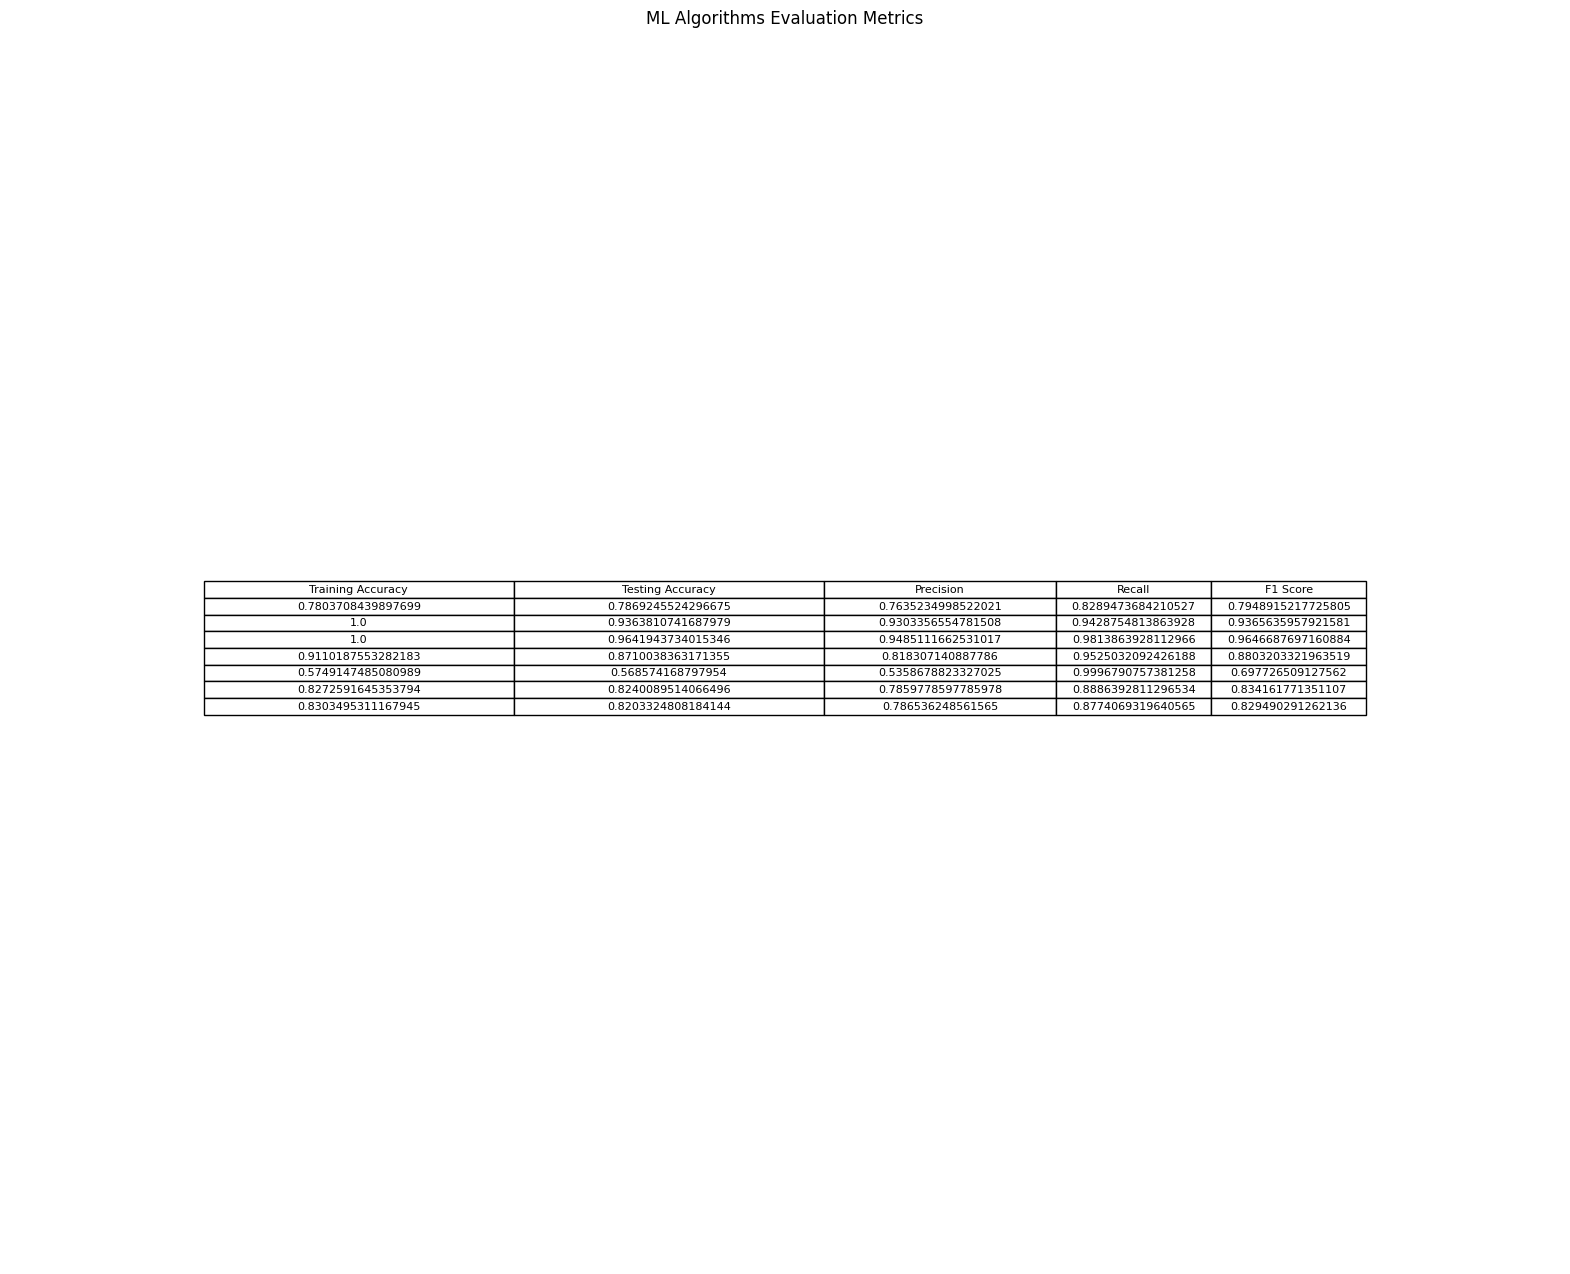

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary with the evaluation metrics
metrics = {
    'Algorithm': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K Neighbors Classifier', 'Naive Bayes', 'SVM', 'Gradient Boosting'],
    'Training Accuracy': [lr_accuracy1, dt_accuracy1, rf_accuracy1, kc_accuracy1, nb_accuracy1, svm_accuracy1, gb_accuracy1],
    'Testing Accuracy': [lr_accuracy2, dt_accuracy2, rf_accuracy2, kc_accuracy2, nb_accuracy2, svm_accuracy2, gb_accuracy2],
    'Precision': [lr_precision, dt_precision, rf_precision, kc_precision, nb_precision, svm_precision, gb_precision],
    'Recall': [lr_recall, dt_recall, rf_recall, kc_recall, nb_recall, svm_recall, gb_recall],
    'F1 Score': [lr_f1, dt_f1, rf_f1, kc_f1, nb_f1, svm_f1, gb_f1]
}

# Create a DataFrame from the dictionary
df_metrics = pd.DataFrame(metrics)

# Set the 'Algorithm' column as the index
df_metrics.set_index('Algorithm', inplace=True)

# Plot the table
fig, ax = plt.subplots(figsize=(20, 16))
ax.axis('off')

ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center', colWidths=[0.2, 0.2, 0.15, 0.1, 0.1, 0.1])
plt.title('ML Algorithms Evaluation Metrics')
plt.show()


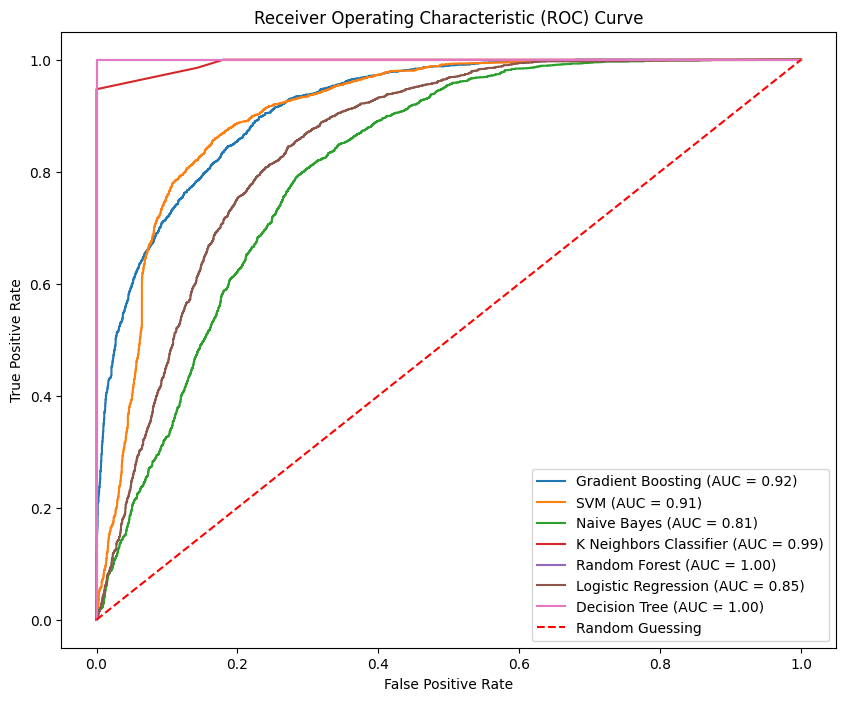

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Initialize the classifiers
classifiers = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC(probability=True)),
    ('Naive Bayes', GaussianNB()),
    ('K Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Plot the ROC curve for each classifier
plt.figure(figsize=(10, 8))

for name, classifier in classifiers:
    classifier.fit(X, y)
    y_prob = classifier.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Split the dataset into X and y
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Initialize the regressors
regressors = [
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('SVM', SVR()),
    ('Naive Bayes', GaussianNB()),
    ('K Neighbors Regressor', KNeighborsRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor())
]

# Calculate and print the metrics for each regressor
for name, regressor in regressors:
    regressor.fit(X, y)
    y_pred = regressor.predict(X)
    rmse = mean_squared_error(y, y_pred, squared=False)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    print(f'{name}:')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print('----------------------------------')



Gradient Boosting:
RMSE: 0.35
MAE: 0.26
MSE: 0.12
----------------------------------
SVM:
RMSE: 0.34
MAE: 0.21
MSE: 0.11
----------------------------------
Naive Bayes:
RMSE: 0.65
MAE: 0.43
MSE: 0.43
----------------------------------
K Neighbors Regressor:
RMSE: 0.19
MAE: 0.08
MSE: 0.04
----------------------------------
Random Forest:
RMSE: 0.04
MAE: 0.02
MSE: 0.00
----------------------------------
Linear Regression:
RMSE: 0.39
MAE: 0.32
MSE: 0.15
----------------------------------
Decision Tree:
RMSE: 0.00
MAE: 0.00
MSE: 0.00
----------------------------------


In [ ]:
# Save Model

import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(random_forest,file)

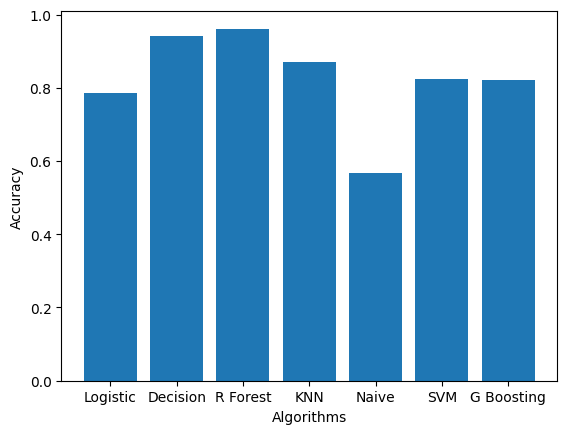

In [ ]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_accuracy,dt_accuracy,rf_accuracy,kc_accuracy,nb_accuracy, svm_accuracy, gb_accuracy ])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

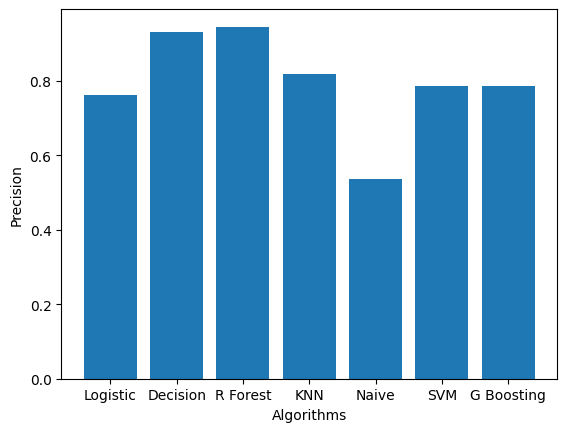

In [ ]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_precision,dt_precision,rf_precision,kc_precision,nb_precision, svm_precision, gb_precision])
plt.xlabel("Algorithms")
plt.ylabel("Precision")
plt.show()

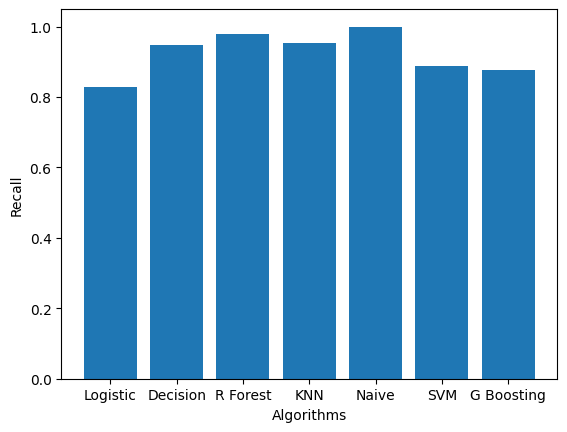

In [ ]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_recall,dt_recall,rf_recall,kc_recall,nb_recall, svm_recall, gb_recall ])
plt.xlabel("Algorithms")
plt.ylabel("Recall")
plt.show()

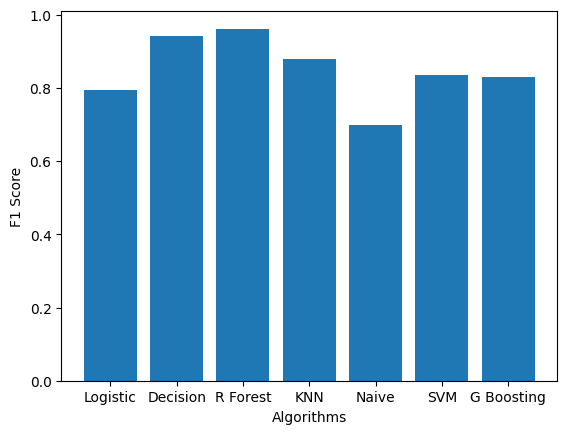

In [ ]:
plt.bar(['Logistic', 'Decision','R Forest', 'KNN', 'Naive','SVM', 'G Boosting'],[lr_f1,dt_f1,rf_f1,kc_f1,nb_f1, svm_f1, gb_f1 ])
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.show()

In [ ]:
# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', 'K Neighbors' ,'Gradient Boosting'],
    'Training Accuracy': [rf_accuracy1, dt_accuracy1, lr_accuracy1, svm_accuracy1, nb_accuracy1, kc_accuracy1, gb_accuracy1],
    'Testing Accuracy': [rf_accuracy2, dt_accuracy2, lr_accuracy2, svm_accuracy2, nb_accuracy2, kc_accuracy2, gb_accuracy2],
    'Precision': [rf_precision, dt_precision, lr_precision, svm_precision, nb_precision, kc_precision, gb_precision],
    'Recall': [rf_recall, dt_recall, lr_recall, svm_recall, nb_recall, kc_recall, gb_recall],
    'F1-Score': [rf_f1, dt_f1, lr_f1, svm_f1, nb_f1, kc_f1, gb_f1]
})

# Print the results
print(results_df)

                 Model  Training Accuracy  Testing Accuracy  Precision  \
0        Random Forest           1.000000          0.964194   0.948511   
1        Decision Tree           1.000000          0.936381   0.930336   
2  Logistic Regression           0.780371          0.786925   0.763523   
3                  SVM           0.827259          0.824009   0.785978   
4          Naive Bayes           0.574915          0.568574   0.535868   
5          K Neighbors           0.911019          0.871004   0.818307   
6    Gradient Boosting           0.830350          0.820332   0.786536   

     Recall  F1-Score  
0  0.981386  0.964669  
1  0.942875  0.936564  
2  0.828947  0.794892  
3  0.888639  0.834162  
4  0.999679  0.697727  
5  0.952503  0.880320  
6  0.877407  0.829490  


In [ ]:
results_df

Model  Training Accuracy  Testing Accuracy  Precision  \
0        Random Forest           1.000000          0.964194   0.948511   
1        Decision Tree           1.000000          0.936381   0.930336   
2  Logistic Regression           0.780371          0.786925   0.763523   
3                  SVM           0.827259          0.824009   0.785978   
4          Naive Bayes           0.574915          0.568574   0.535868   
5          K Neighbors           0.911019          0.871004   0.818307   
6    Gradient Boosting           0.830350          0.820332   0.786536   

     Recall  F1-Score  
0  0.981386  0.964669  
1  0.942875  0.936564  
2  0.828947  0.794892  
3  0.888639  0.834162  
4  0.999679  0.697727  
5  0.952503  0.880320  
6  0.877407  0.829490

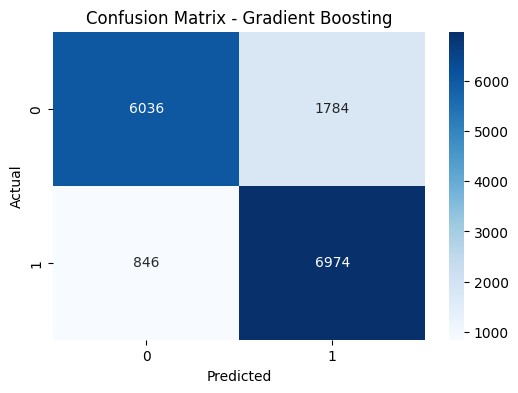

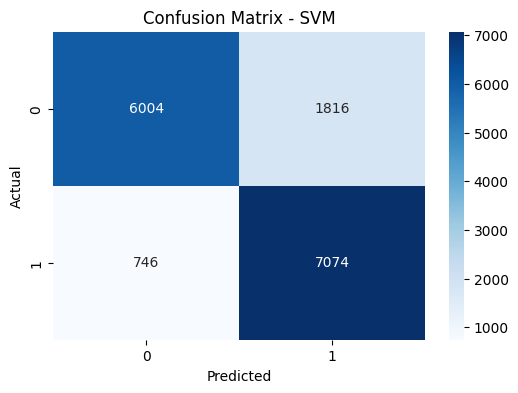

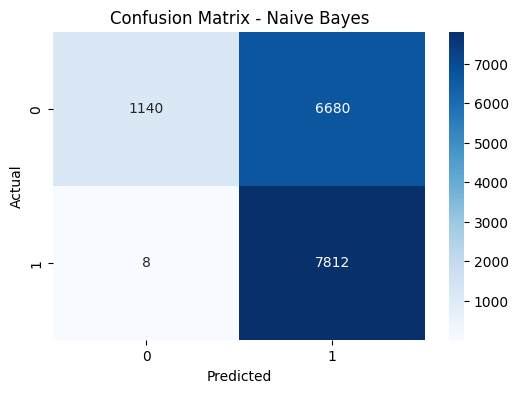

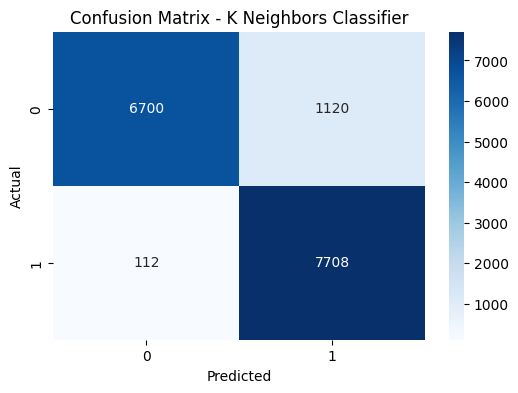

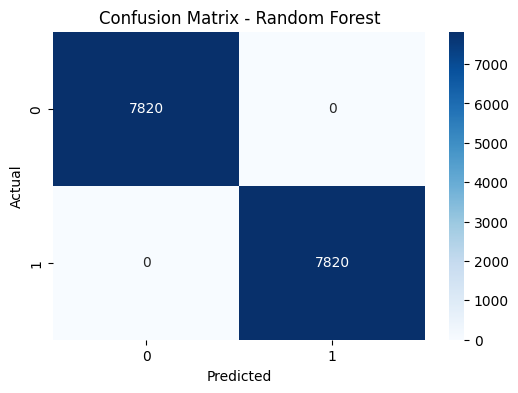

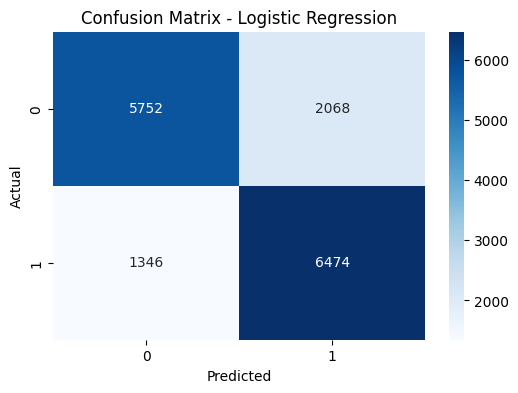

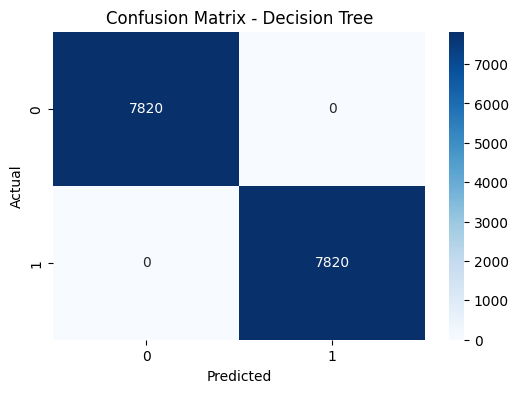

In [ ]:
from sklearn.metrics import confusion_matrix

# Initialize the classifiers
classifiers = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('SVM', SVC()),
    ('Naive Bayes', GaussianNB()),
    ('K Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier())
]

# Create a colorful table for the confusion matrix
for name, classifier in classifiers:
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()